# Retail Buyer Segmentation 
This project implements an end-to-end Retail Buyer Segmentation and Prediction system using real customer-level retail data. The objective is simple and practical:
identify distinct groups of customers based on their demographics, behavior, and purchasing patterns, then build models that can automatically assign new customers to these groups.

The workflow follows three main stages:

Understanding and preparing the data through exploratory data analysis (EDA), cleaning, missing-value handling, and feature transformation.

Discovering natural customer segments using clustering techniques applied to the full dataset and interpreting each segment in business terms.

Training classification models to predict customer segment membership for new or unseen customers, enabling scalable and automated decision-making.

This approach allows businesses to move from raw transactional data to actionable customer profiles that support targeted marketing, personalized campaigns, and reduced marketing waste.

# Dataset Overview

The dataset represents individual retail customers and combines demographic information, household structure, purchase behavior, campaign responses, and channel activity. Each row corresponds to one customer, uniquely identified by `customer_id`.

- Customer Identification & Demographics
   - `customer_id` — Unique identifier for each customer
   - `birth_year` — Year of birth (used to derive customer age)
   - `education_level` — Education category (Basic, HighSchool, Graduate, Postgraduate, Unknown)
   - `marital_status` — Marital status (Single, Married, Divorced, Widowed, Unknown)
   - `annual_income` — Household annual income (numeric)

- Household Information
  - `num_children` — Number of children living at home
  - `num_teenagers` — Number of teenagers living at home

- Customer History & Engagement
   - `signup_date` — Date when the customer first engaged with the company
   - `days_since_last_purchase` — Number of days since the customer’s most recent purchase
   - `has_recent_complaint` — Binary indicator (1 = complaint, 0 = no complaint)

- Spending Behavior 
   - `spend_wine` — Spending on wine
   - `spend_fruits` — Spending on fruits
   - `spend_meat` — Spending on meat
   - `spend_fish` — Spending on fish
   - `spend_sweets` — Spending on sweets
   - `spend_gold` — Spending on gold products

These variables capture customer value and product preferences.
- Promotions & Campaign Response
   - `num_discount_purchases` — Number of purchases made using discounts
   - `accepted_campaign_1` … `accepted_campaign_5` — Binary indicators showing whether the customer accepted each promotional campaign
   - `accepted_last_campaign` — Binary indicator for acceptance of the most recent campaign

- Channels & Purchase Activity
   - `num_web_purchases` — Number of purchases made through the website
   - `num_catalog_purchases` — Number of purchases made via catalogs
   - `num_store_purchases` — Number of in-store purchases
   - `web_visits_last_month` — Number of website visits in the last month

# Import the libraries

In [637]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,recall_score,silhouette_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from matplotlib import colors
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')


# Data Overview

In [638]:
df = pd.read_csv("Data\data.csv")

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2240 non-null   int64  
 1   birth_year                2240 non-null   int64  
 2   education_level           2199 non-null   object 
 3   marital_status            2240 non-null   object 
 4   annual_income             2173 non-null   float64
 5   num_children              2240 non-null   int64  
 6   num_teenagers             2196 non-null   float64
 7   signup_date               2240 non-null   object 
 8   days_since_last_purchase  2240 non-null   int64  
 9   has_recent_complaint      2240 non-null   int64  
 10  spend_wine                2240 non-null   int64  
 11  spend_fruits              2240 non-null   int64  
 12  spend_meat                2240 non-null   int64  
 13  spend_fish                2240 non-null   int64  
 14  spend_sw

###### We need to convert "education_level", "marital_status", "signup_date"

In [640]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
customer_id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
birth_year,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
annual_income,2173.0,52266.031293,25274.007394,1730.0,35196.00,51411.0,68487.00,666666.0
num_children,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
num_teenagers,2196.0,0.506375,0.543720,0.0,0.00,0.0,1.00,2.0
days_since_last_purchase,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
has_recent_complaint,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0
spend_wine,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
spend_fruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
spend_meat,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


###### There are nulls

##### Count of values

In [641]:
counts_all = {col: df[col].value_counts() for col in df.columns}
counts_all

{'customer_id': customer_id
 5524     1
 2174     1
 4141     1
 6182     1
 5324     1
         ..
 10870    1
 4001     1
 7270     1
 8235     1
 9405     1
 Name: count, Length: 2240, dtype: int64,
 'birth_year': birth_year
 1976    89
 1971    87
 1975    83
 1972    79
 1978    77
 1970    77
 1965    74
 1973    74
 1969    71
 1974    69
 1956    55
 1979    53
 1958    53
 1977    52
 1952    52
 1959    51
 1968    51
 1966    50
 1954    50
 1955    49
 1960    49
 1963    45
 1982    45
 1967    44
 1962    44
 1957    43
 1951    43
 1983    42
 1986    42
 1964    42
 1981    39
 1980    39
 1984    38
 1961    36
 1953    35
 1985    32
 1949    30
 1989    30
 1950    29
 1988    29
 1987    27
 1948    21
 1990    18
 1946    16
 1947    16
 1991    15
 1992    13
 1945     8
 1943     7
 1944     7
 1995     5
 1993     5
 1994     3
 1996     2
 1900     1
 1893     1
 1899     1
 1941     1
 1940     1
 Name: count, dtype: int64,
 'education_level': education_level


###### These columns have a majority of zero values: 'has_recent_complaint', 'accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', and 'accepted_last_campaign'. We will drop some or engineer a new feature.

In [642]:
backup = df.copy()

In [643]:
df.nunique()

customer_id                 2240
birth_year                    59
education_level                5
marital_status                 8
annual_income               1938
num_children                   3
num_teenagers                  3
signup_date                  663
days_since_last_purchase     100
has_recent_complaint           2
spend_wine                   776
spend_fruits                 158
spend_meat                   558
spend_fish                   182
spend_sweets                 177
spend_gold                   213
num_discount_purchases        15
num_web_purchases             15
num_catalog_purchases         14
num_store_purchases           14
web_visits_last_month         16
accepted_campaign_1            2
accepted_campaign_2            2
accepted_campaign_3            2
accepted_campaign_4            2
accepted_campaign_5            2
accepted_last_campaign         2
dtype: int64

# Clean the Data

#### Duplicating

In [644]:
df.duplicated().sum()

np.int64(0)

#### Nulls 

In [645]:
df.isnull().sum()

customer_id                  0
birth_year                   0
education_level             41
marital_status               0
annual_income               67
num_children                 0
num_teenagers               44
signup_date                  0
days_since_last_purchase     0
has_recent_complaint         0
spend_wine                   0
spend_fruits                 0
spend_meat                   0
spend_fish                   0
spend_sweets                 0
spend_gold                   0
num_discount_purchases       0
num_web_purchases            0
num_catalog_purchases        0
num_store_purchases          0
web_visits_last_month        0
accepted_campaign_1          0
accepted_campaign_2          0
accepted_campaign_3          0
accepted_campaign_4          0
accepted_campaign_5          0
accepted_last_campaign       0
dtype: int64

In [646]:
#df.dropna(inplace=True)

#### Fill with median or mode

In [647]:
df['annual_income'].fillna(df['annual_income'].median(), inplace=True)
df['education_level'].fillna(df['education_level'].mode()[0], inplace=True)
df['num_teenagers'].fillna(df['num_teenagers'].median(), inplace=True)

#### Imputer

In [648]:
# imputer= SimpleImputer(strategy='median') # mode 
# df[['annual_income','education_level','num_teenagers']]= imputer.fit_transform(df[['annual_income','education_level','num_teenagers']])

#### KNN imputer 

In [649]:
# df_encoding = df.copy()
# label_encoder = LabelEncoder()
# categorical_columns = df_encoding.select_dtypes(exclude=[np.number]).columns.tolist()
# if 'customer_id' in categorical_columns:
#     categorical_columns.remove('customer_id')
# for col in categorical_columns:
#     df_encoding[col] = label_encoder.fit_transform(df_encoding[col].astype(str))

In [650]:
# knn = KNNImputer(n_neighbors=3)
# df_KNN = knn.fit_transform(df_encoding)
# df = pd.DataFrame(df_KNN, columns=df_encoding.columns)
# df.isnull().sum()

#### Iterative imputer

In [651]:
# iter_imputer = IterativeImputer(random_state = 42)
# df_iter = iter_imputer.fit_transform(df_encoding)
# df = pd.DataFrame(df_iter, columns=df_encoding.columns)
# df.isnull().sum()

# Feature Engineering
We need to know whether the client will accept the next campaign or not.

#### Total Campaigns

In [652]:
campaign_columns = ['accepted_campaign_1', 'accepted_campaign_2', 'accepted_campaign_3', 'accepted_campaign_4', 'accepted_campaign_5', 'accepted_last_campaign']
df['total_accepted_campaigns'] = df[campaign_columns].max(axis=1)
df['total_accepted_campaigns'].value_counts()

total_accepted_campaigns
0    1631
1     609
Name: count, dtype: int64

- `.sum` when every column has a value.
- `.max` for an OR-style aggregation.
- `.min` for an AND-style aggregation.

#### Age

In [653]:
ref_year = 2014
df['age'] = ref_year - df['birth_year']


We use 2014 because this is the last year available in the signup data.

#### The data

In [654]:

def parse_date(s):
    for fmt in ('%d-%m-%Y','%d/%m/%Y','%m/%d/%Y','%d-%m-%y','%d/%m/%y'):
        try:
            return pd.to_datetime(s, format=fmt)
        except:
            continue
    try:
        return pd.to_datetime(s, dayfirst=True, errors='coerce')
    except:
        return pd.NaT

In [655]:
df['signup_date_parsed'] = df['signup_date'].apply(parse_date)
print("Unparsed signup_date:", df['signup_date_parsed'].isna().sum())

df['signup_year'] = df['signup_date_parsed'].dt.year.fillna(0).astype(int)

Unparsed signup_date: 0


We need to parse the `signup_date` column to a datetime type to create a signup year column.

##### Total Spend

In [656]:
total_spend = ['spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish', 'spend_sweets', 'spend_gold']
df['total_spent'] = df[total_spend].sum(axis=1)

#### Total Purchases

In [657]:
total_purchases = ['num_discount_purchases', 'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases']
df['total_purchases'] = df[total_purchases].sum(axis=1)

### Living with

In [658]:
df["living_with"]=df["marital_status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [659]:
df['children'] = df['num_teenagers'] + df['num_children']

In [660]:
df["family_size"] = df["living_with"].replace({"Alone": 1, "Partner":2}) + df["children"]

###### I will try the median

#### Education 

In [661]:
df["education_level"]=df["education_level"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#### Dropping

In [662]:
df.drop(columns=['has_recent_complaint','accepted_campaign_1','accepted_campaign_2',
'accepted_campaign_3','accepted_campaign_4','accepted_campaign_5','accepted_last_campaign',
'customer_id','signup_date_parsed', 'birth_year', 'signup_date', 'marital_status','living_with',
'children'],axis=1,inplace=True)
df.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size
0,Graduate,58138.0,0,0.0,58,635,88,546,172,88,...,8,10,4,7,1,57,2012,1617,25,1.0
1,Graduate,46344.0,1,1.0,38,11,1,6,2,1,...,1,1,2,5,0,60,2014,27,6,3.0
2,Graduate,71613.0,0,0.0,26,426,49,127,111,21,...,8,2,10,4,0,49,2013,776,21,2.0
3,Graduate,26646.0,1,0.0,26,11,4,20,10,3,...,2,0,4,6,0,30,2014,53,8,3.0
4,Postgraduate,58293.0,1,0.0,94,173,43,118,46,27,...,5,3,6,5,0,33,2014,422,19,3.0


In [663]:
df.shape

(2240, 22)

### Numerical Columns

In [664]:
numerical_cols = ['annual_income', 'days_since_last_purchase',
'spend_wine', 'spend_fruits', 'spend_meat', 'spend_fish',
'spend_sweets', 'spend_gold', 'num_discount_purchases',
'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
'web_visits_last_month','age', 'total_spent', 'total_purchases']

num_cols = df[numerical_cols]
num_cols

,annual_income,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,spend_gold,num_discount_purchases,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,age,total_spent,total_purchases
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,57,1617,25
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,60,27,6
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,49,776,21
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,30,53,8
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,33,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,3,4,5,47,1341,18
2236,64014.0,56,406,0,30,0,0,8,7,8,2,5,7,68,444,22
2237,56981.0,91,908,48,217,32,12,24,1,2,3,13,6,33,1241,19
2238,69245.0,8,428,30,214,80,30,61,2,6,5,10,3,58,843,23


##### Categorical Columns

In [665]:
categorical_cols = ['signup_year','total_accepted_campaigns', 'num_children', 
'num_teenagers','education_level'                       
]
cat_cols = df[categorical_cols]
cat_cols

,signup_year,total_accepted_campaigns,num_children,num_teenagers,education_level
0,2012,1,0,0.0,Graduate
1,2014,0,1,1.0,Graduate
2,2013,0,0,0.0,Graduate
3,2014,0,1,0.0,Graduate
4,2014,0,1,0.0,Postgraduate
...,...,...,...,...,...
2235,2013,0,0,1.0,Graduate
2236,2014,1,2,1.0,Postgraduate
2237,2014,1,0,0.0,Graduate
2238,2014,0,0,1.0,Postgraduate


# EDA


## Analyze Numerical Feature Distributions

Visualize the distributions of numerical features using histograms and box plots to identify their spread, central tendency, and potential outliers.


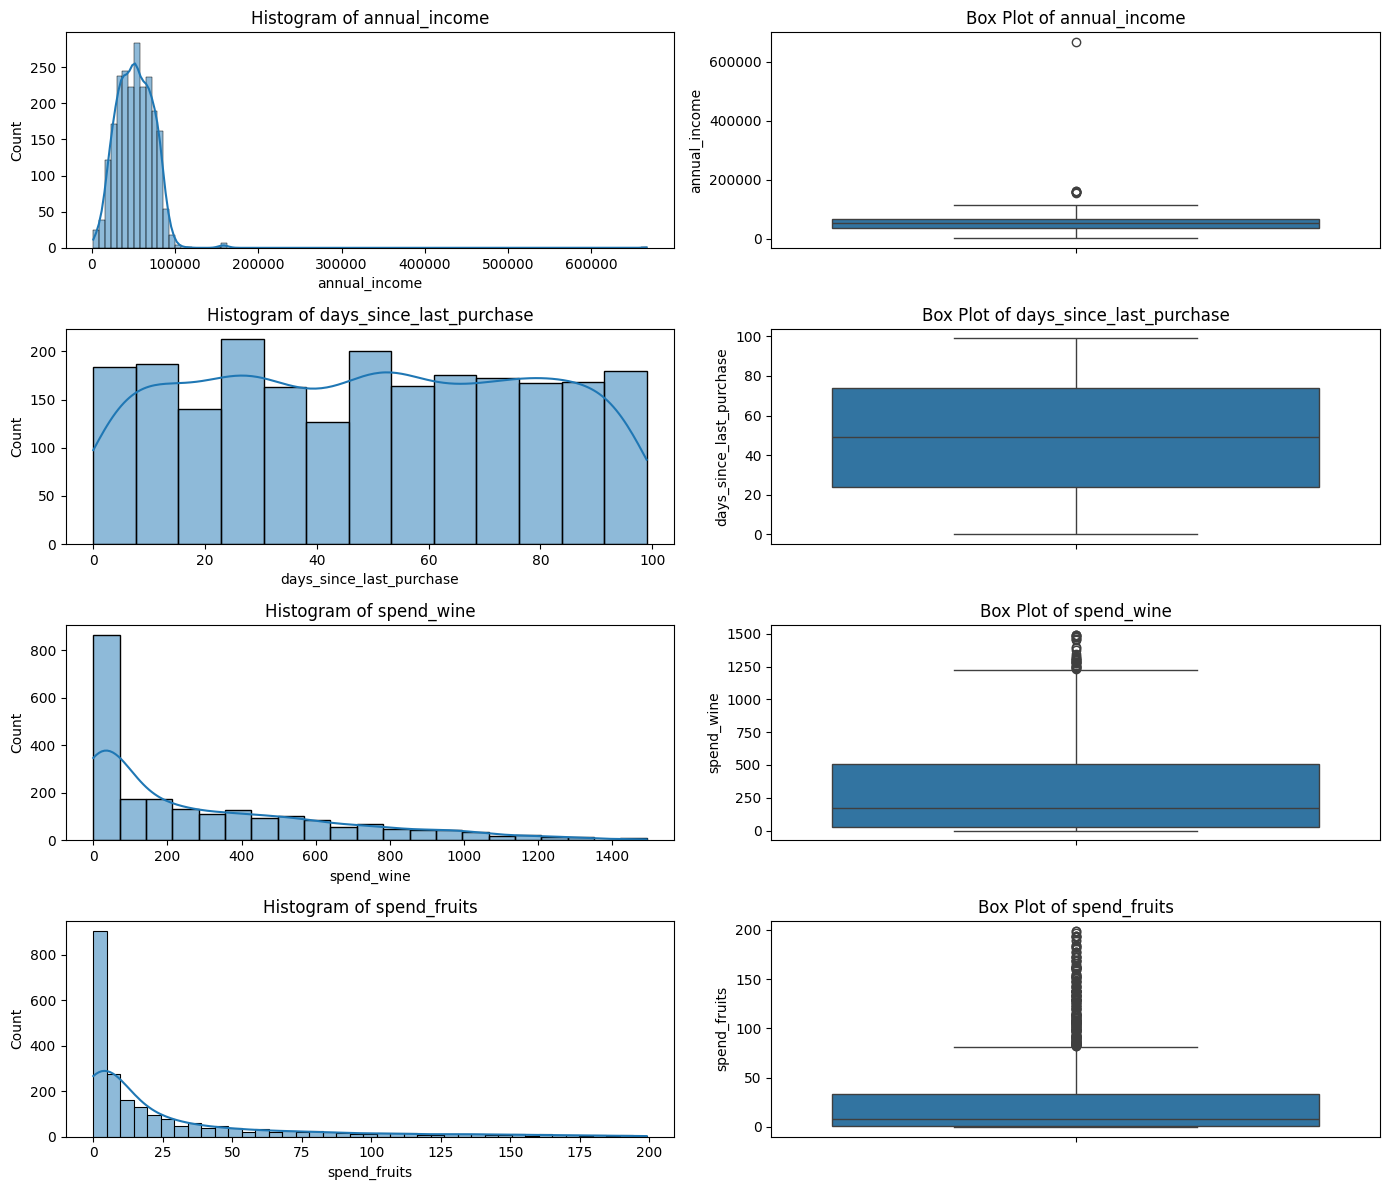

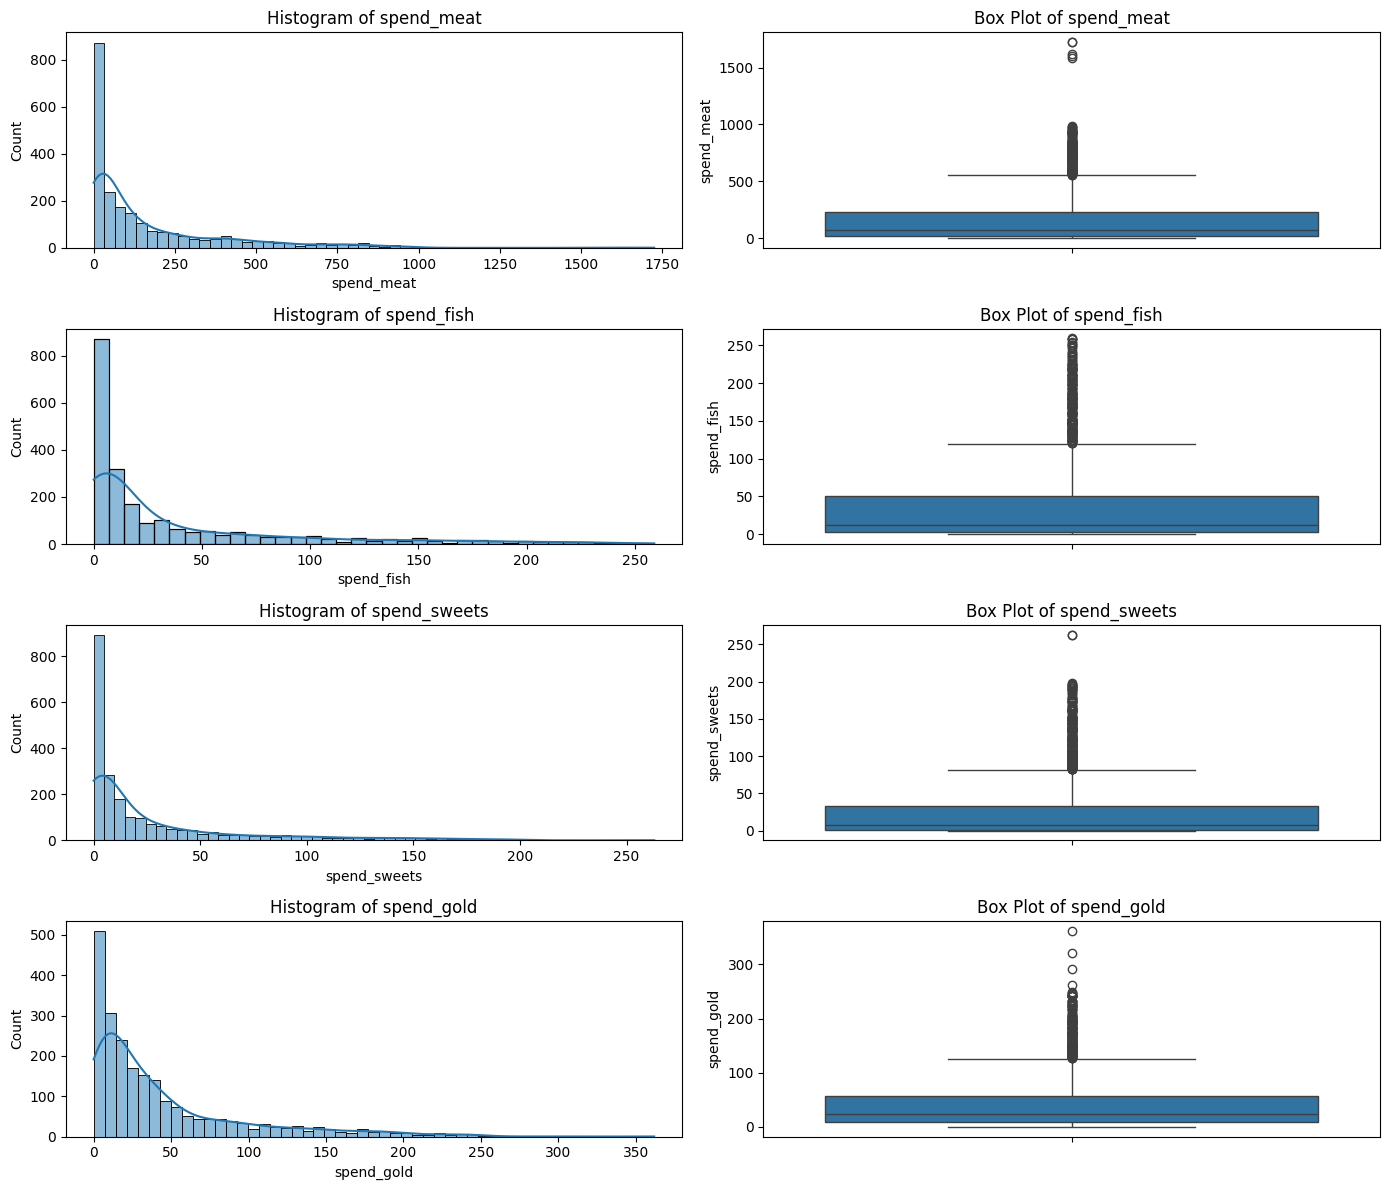

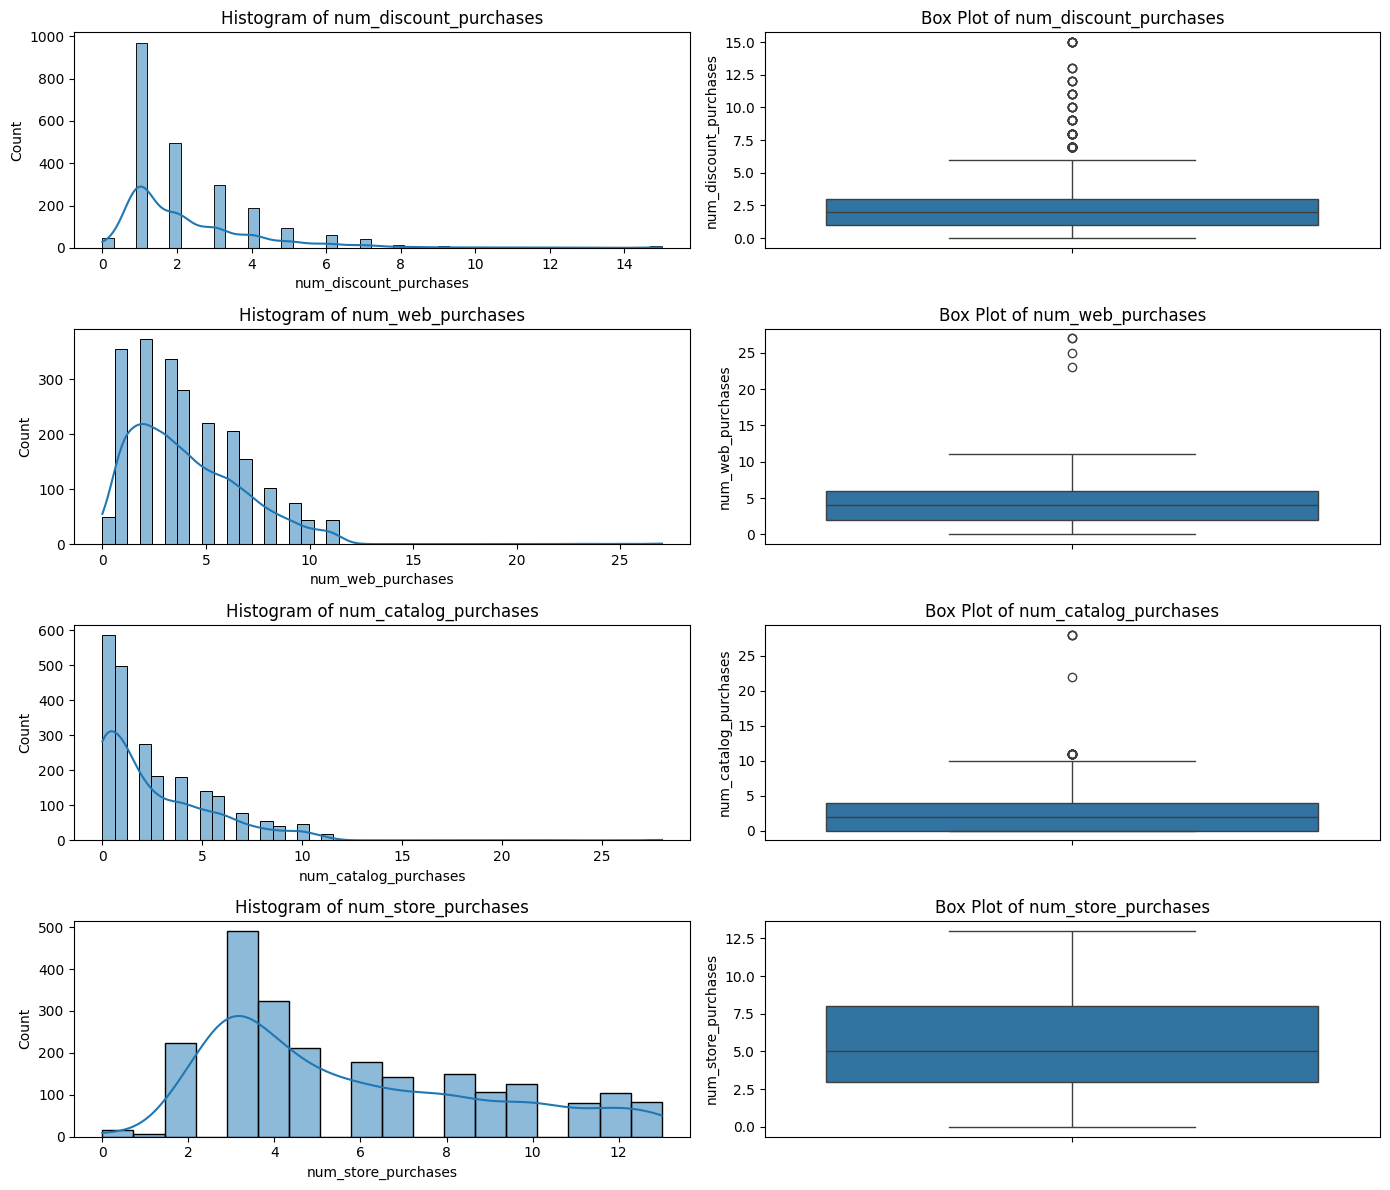

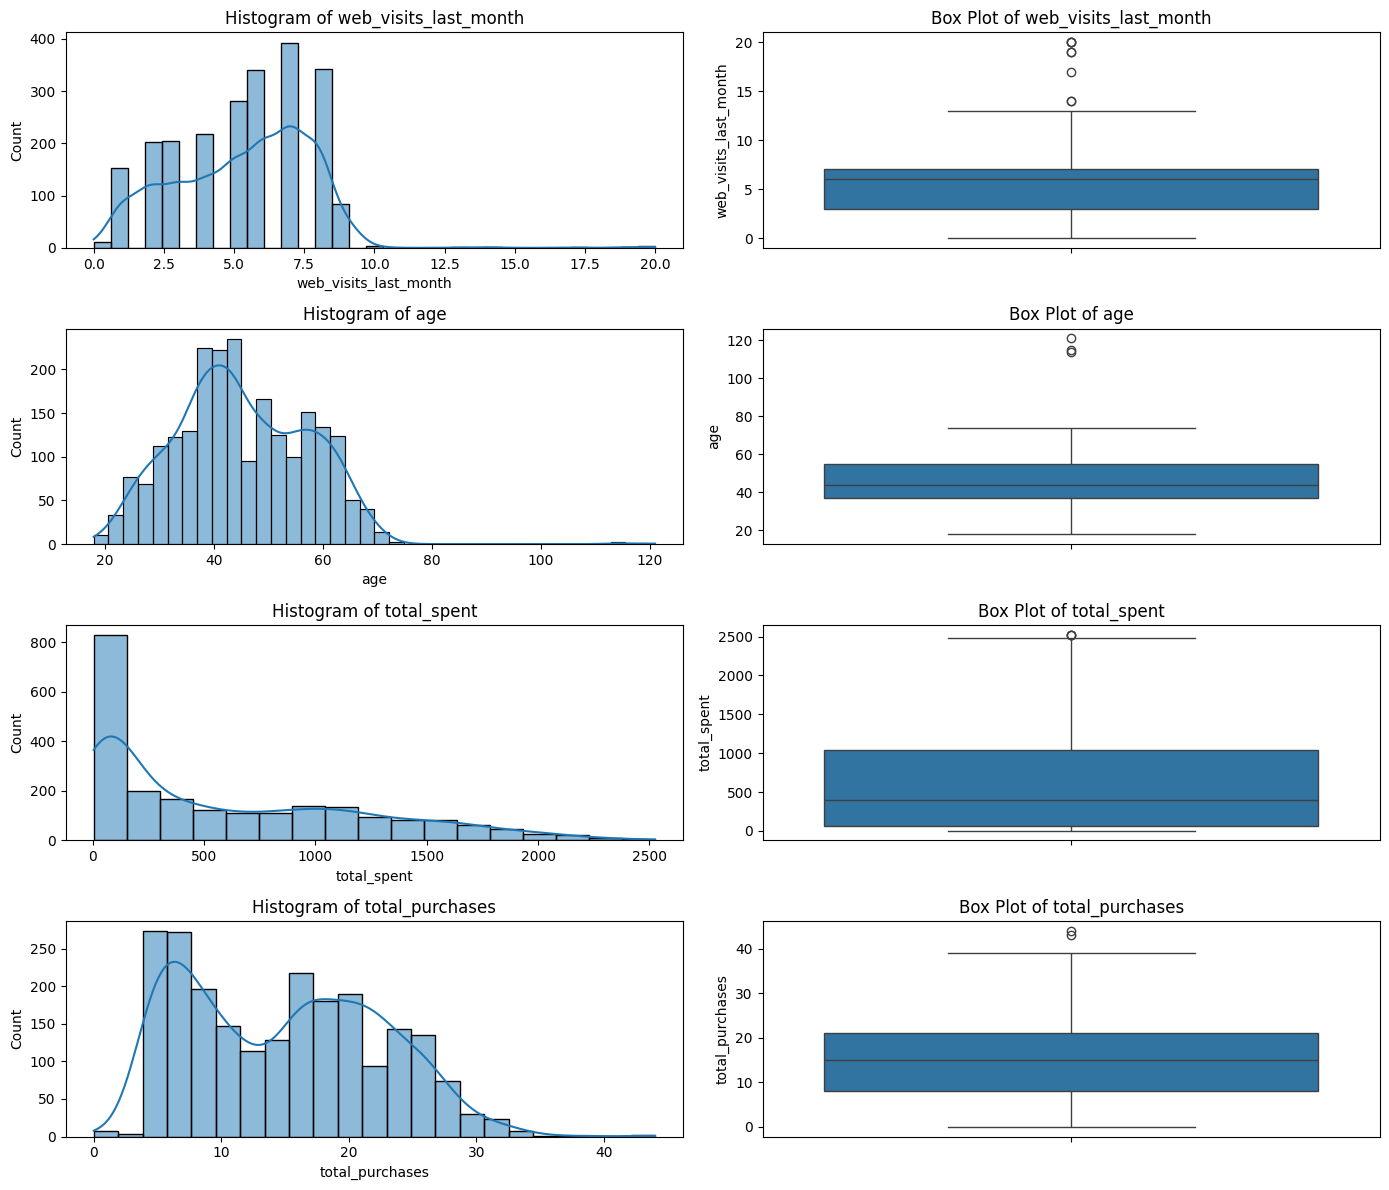

In [666]:
# Plot numerical features in smaller batches to avoid memory issues
batch_size = 4  # Number of columns per figure

for batch_start in range(0, len(num_cols.columns), batch_size):
    batch_cols = num_cols.columns[batch_start:batch_start + batch_size]
    
    plt.figure(figsize=(14, 3 * len(batch_cols)))
    
    for i, col in enumerate(batch_cols):
        plt.subplot(len(batch_cols), 2, 2*i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')

        plt.subplot(len(batch_cols), 2, 2*i + 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

## Analyze Categorical Feature Distributions


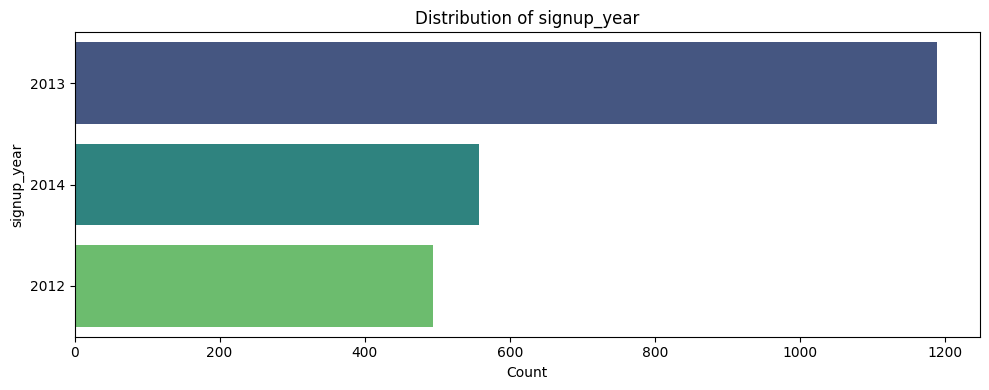

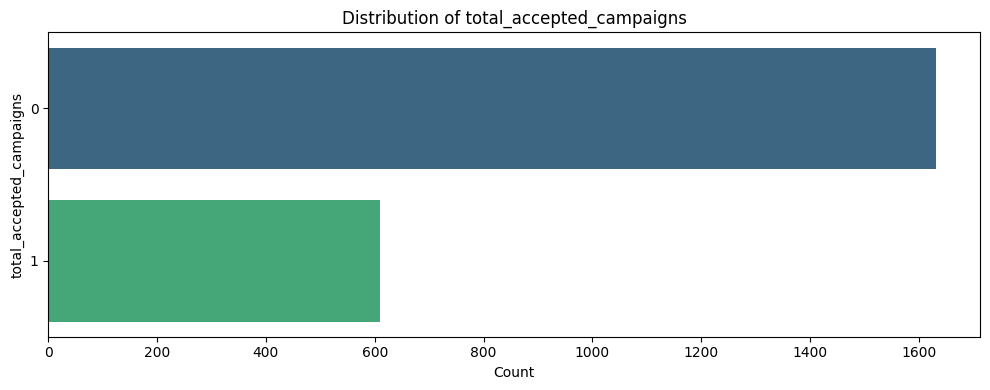

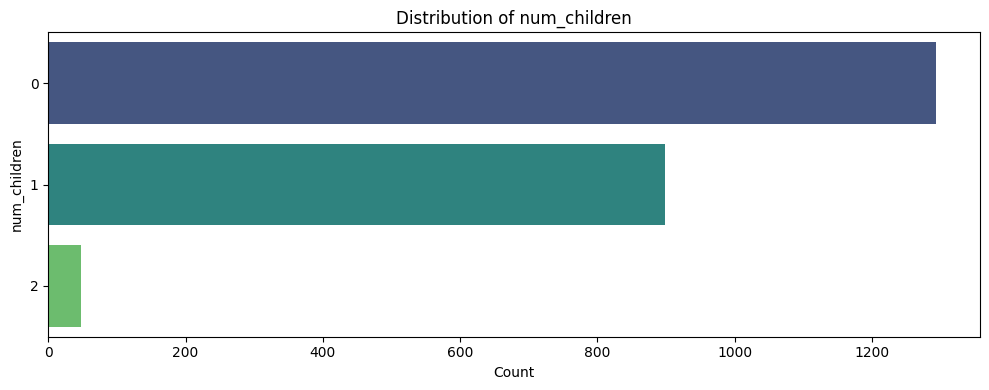

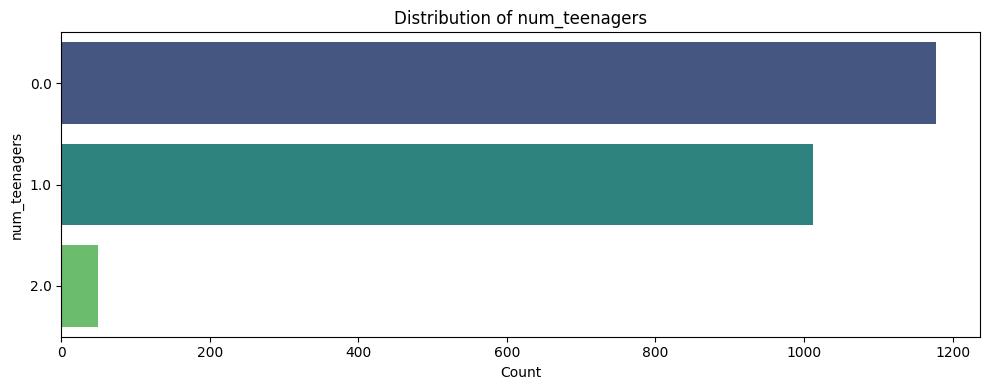

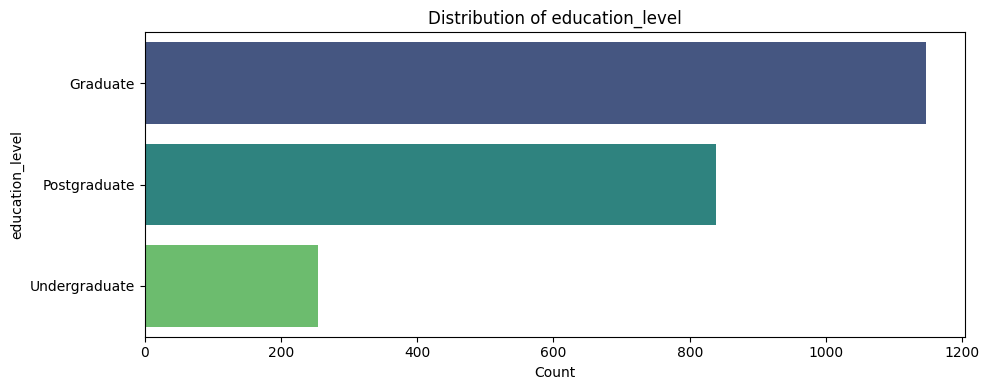

In [667]:
# Plot categorical features one at a time to avoid memory issues
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.close()  # Free memory after each plot

## Analyze Numerical Feature Correlations

### Subtask:
Explore correlations between numerical features using a heatmap to identify strong positive or negative relationships.

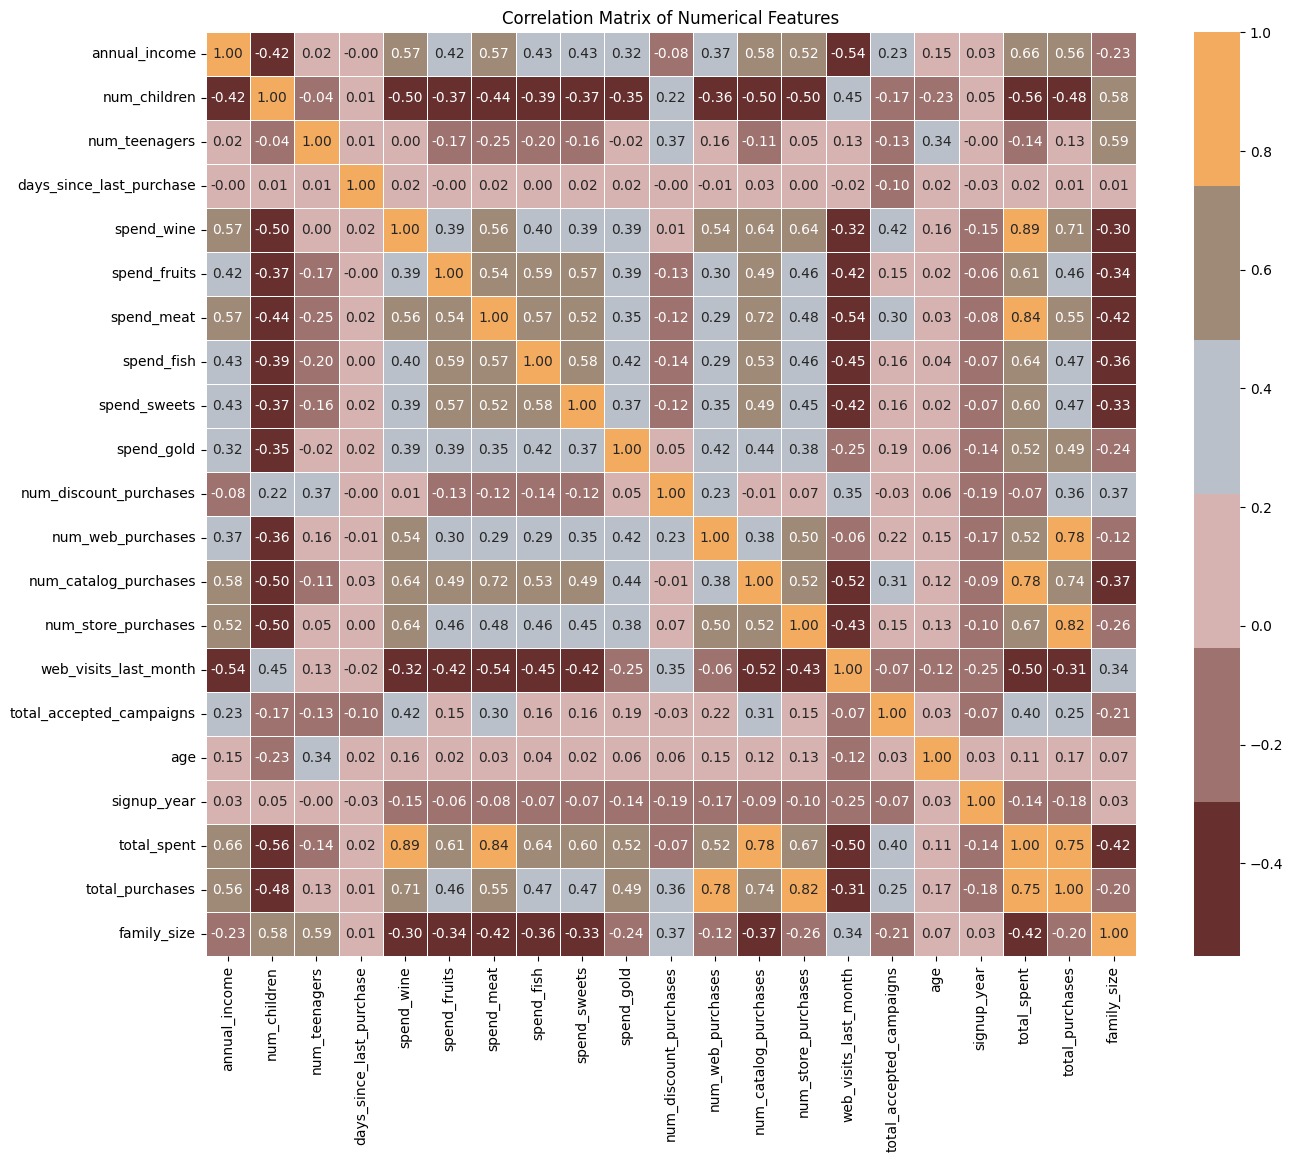

Generated a heatmap of correlations between numerical features.


In [668]:
nums_cols = df.select_dtypes(include = ['int','float'])
correlation_matrix = df[nums_cols.columns].corr()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap= cmap, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Generated a heatmap of correlations between numerical features.")

remove meat, wine spend, catalog

## Analyze `total_accepted_campaigns` Feature

### Subtask:
Examine the distribution and relationships of the 'total_accepted_campaigns' feature.

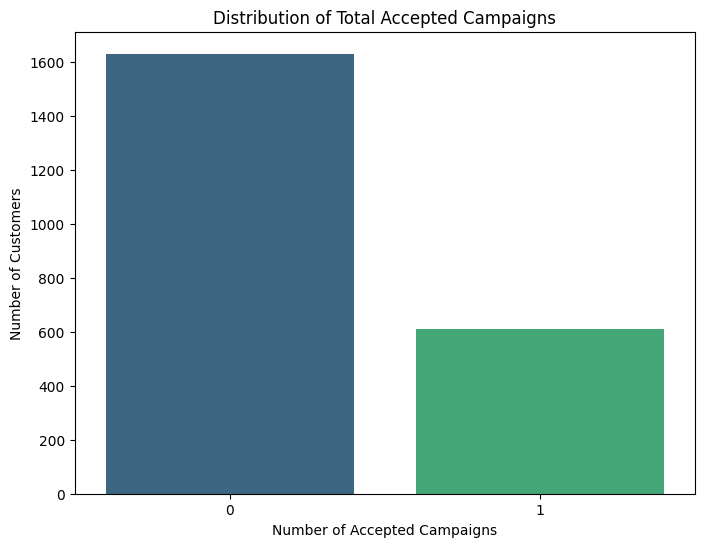

In [669]:
plt.figure(figsize=(8, 6))
sns.countplot(x='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Distribution of Total Accepted Campaigns')
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Number of Customers')
plt.show()


## Analyze 'total_accepted_campaigns' feature relationships

relationships between 'total_accepted_campaigns' and other relevant features, such as 'annual_income' and 'education_level'.


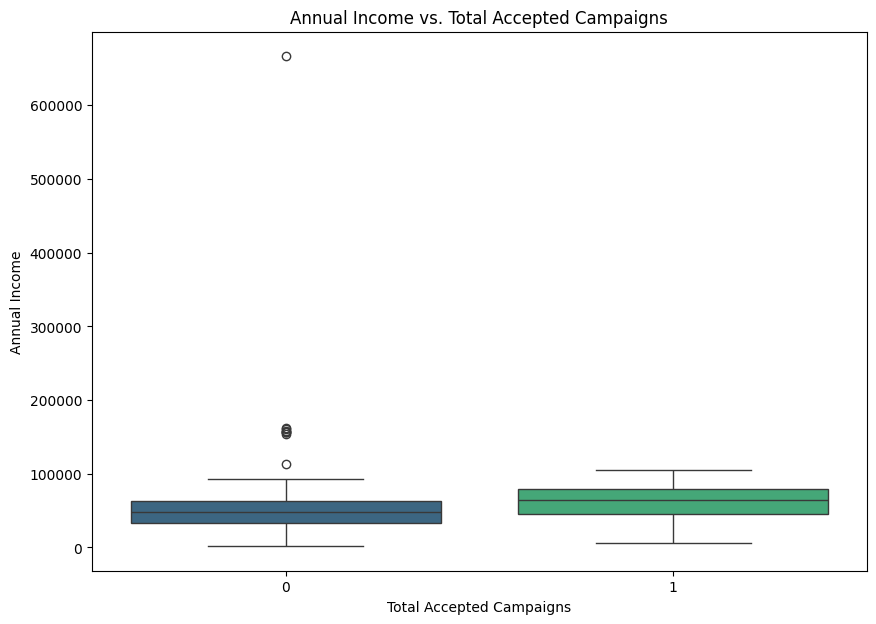

In [670]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='total_accepted_campaigns', y='annual_income', data=df, palette='viridis')
plt.title('Annual Income vs. Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Annual Income')
plt.show()


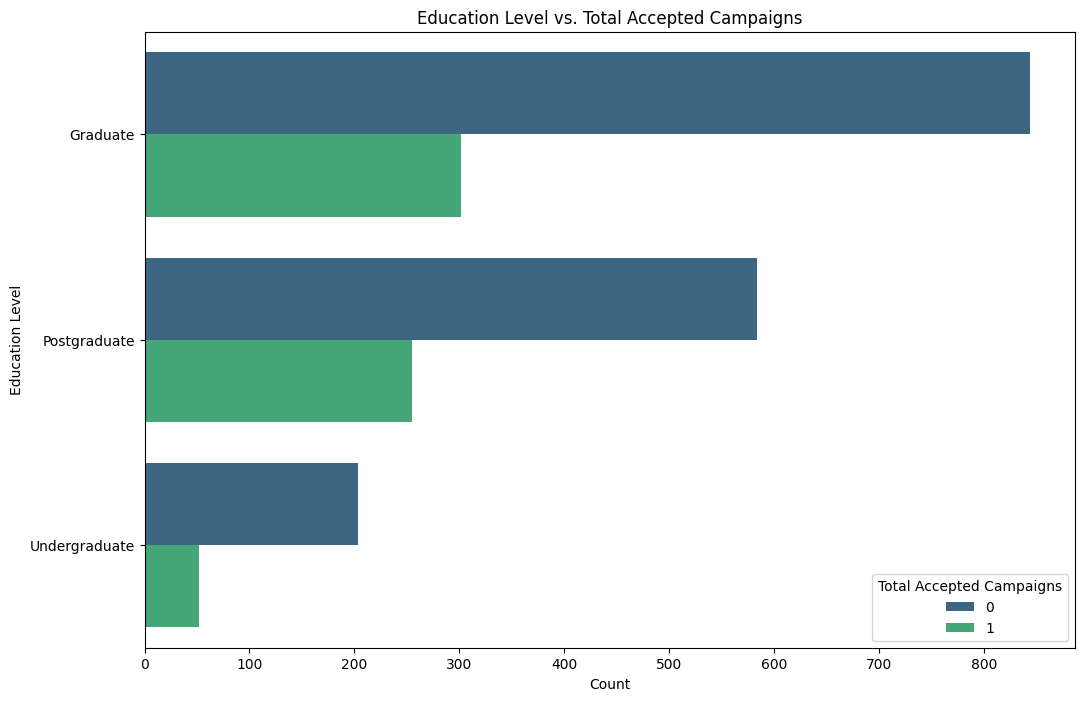

In [671]:
plt.figure(figsize=(12, 8))
sns.countplot(y='education_level', hue='total_accepted_campaigns', data=df, palette='viridis')
plt.title('Education Level vs. Total Accepted Campaigns')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend(title='Total Accepted Campaigns')
plt.show()


# Preprocessing

#### Handle outliers

In [672]:
for col in num_cols.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print (outliers_iqr.count())



education_level             8
annual_income               8
num_children                8
num_teenagers               8
days_since_last_purchase    8
spend_wine                  8
spend_fruits                8
spend_meat                  8
spend_fish                  8
spend_sweets                8
spend_gold                  8
num_discount_purchases      8
num_web_purchases           8
num_catalog_purchases       8
num_store_purchases         8
web_visits_last_month       8
total_accepted_campaigns    8
age                         8
signup_year                 8
total_spent                 8
total_purchases             8
family_size                 8
dtype: int64
education_level             0
annual_income               0
num_children                0
num_teenagers               0
days_since_last_purchase    0
spend_wine                  0
spend_fruits                0
spend_meat                  0
spend_fish                  0
spend_sweets                0
spend_gold                 

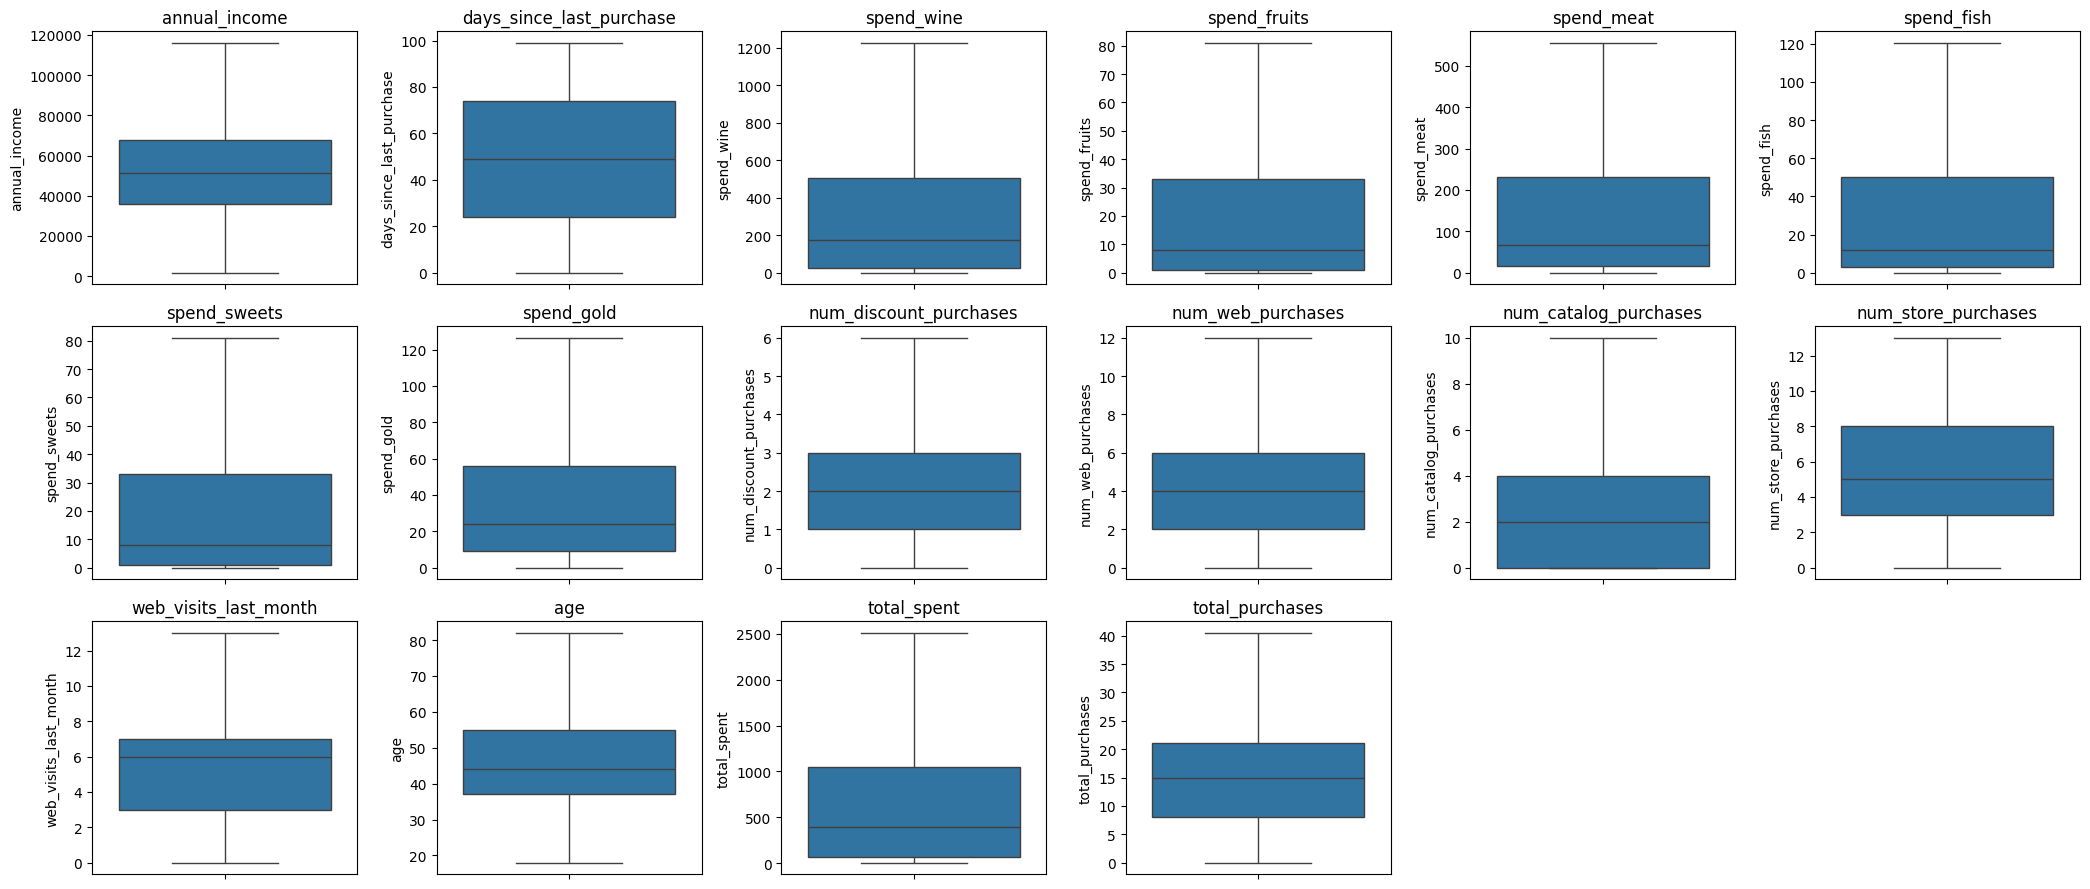

In [673]:
num_plots = len(num_cols.columns)
cols = 6
rows = (num_plots + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols * 3.5, rows * 3))
axes = axes.flatten() # make the loop work on 1D array instead of 2D

for ax, col in zip(axes, num_cols.columns):  # zip for handle the design
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(col)

for ax in axes[num_plots:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Encoding

In [674]:
label_encoder= LabelEncoder()

df['education_level'] = label_encoder.fit_transform(df['education_level'])


In [675]:
df.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size
0,0,58138.0,0,0.0,58,635,81,546,120.5,81,...,8,10,4,7,1,57,2012,1617.0,25.0,1.0
1,0,46344.0,1,1.0,38,11,1,6,2.0,1,...,1,1,2,5,0,60,2014,27.0,6.0,3.0
2,0,71613.0,0,0.0,26,426,49,127,111.0,21,...,8,2,10,4,0,49,2013,776.0,21.0,2.0
3,0,26646.0,1,0.0,26,11,4,20,10.0,3,...,2,0,4,6,0,30,2014,53.0,8.0,3.0
4,1,58293.0,1,0.0,94,173,43,118,46.0,27,...,5,3,6,5,0,33,2014,422.0,19.0,3.0


### Normlization

In [676]:
cols = ['annual_income','spend_wine', 'spend_fruits', 'spend_meat',
        'spend_fish','spend_sweets', 'spend_gold',
        'num_discount_purchases','num_web_purchases',
        'num_catalog_purchases', 'num_store_purchases',
        'web_visits_last_month', 'total_spent']

pt = PowerTransformer(method='yeo-johnson')

df[cols] = pt.fit_transform(df[cols])
df.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size
0,0,0.333964,0,0.0,58,1.062784,1.487681,1.504406,1.493989,1.474200,...,1.358219,1.756826,-0.415926,0.720800,1,57,2012,1.315365,25.0,1.0
1,0,-0.226114,1,1.0,38,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,...,-1.357883,-0.380498,-1.418287,-0.146845,0,60,2014,-1.441417,6.0,3.0
2,0,0.949251,0,0.0,26,0.748918,1.145877,0.456428,1.435812,0.579704,...,1.358219,0.154282,1.244092,-0.571328,0,49,2013,0.661170,21.0,2.0
3,0,-1.226416,1,0.0,26,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,...,-0.720558,-1.335398,-0.415926,0.284150,0,30,2014,-1.117211,8.0,3.0
4,1,0.341179,1,0.0,94,0.123712,1.058075,0.406278,0.832291,0.741799,...,0.525667,0.523444,0.275211,-0.146845,0,33,2014,0.179322,19.0,3.0


### Standardization

In [ ]:
# covert to data fram

cols_to_standardize = [
    'annual_income',
    'age', 'signup_year',
    'total_accepted_campaigns',
    'days_since_last_purchase',
    #'spend_wine', 'spend_fruits',
    #'spend_meat', 'spend_fish',
    #'spend_sweets', 'spend_gold',
    #'num_children', 'num_teenagers',
    #'num_discount_purchases',
    #'num_web_purchases',
    #'num_catalog_purchases',
    #'num_store_purchases',
    'web_visits_last_month',
    'total_spent', 'total_purchases'
]

#scaler = StandardScaler()
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])


In [678]:
df_scaled.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size
0,0,0.553381,0,0.0,0.585859,1.062784,1.487681,1.504406,1.493989,1.474200,...,1.358219,1.756826,-0.415926,0.515871,1.0,0.609375,0.0,0.886214,0.617284,1.0
1,0,0.453996,1,1.0,0.383838,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,...,-1.357883,-0.380498,-1.418287,0.360876,0.0,0.656250,1.0,0.164498,0.148148,3.0
2,0,0.662562,0,0.0,0.262626,0.748918,1.145877,0.456428,1.435812,0.579704,...,1.358219,0.154282,1.244092,0.285047,0.0,0.484375,0.5,0.714948,0.518519,2.0
3,0,0.276494,1,0.0,0.262626,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,...,-0.720558,-1.335398,-0.415926,0.437868,0.0,0.187500,1.0,0.249374,0.197531,3.0
4,1,0.554661,1,0.0,0.949495,0.123712,1.058075,0.406278,0.832291,0.741799,...,0.525667,0.523444,0.275211,0.360876,0.0,0.234375,1.0,0.588802,0.469136,3.0


## Clustering

### PCA

In [679]:
pca = PCA(n_components = 3)
pca.fit(df_scaled)
pca_cols = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2", "col3"]))
pca_cols.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,5.392512e-17,2.542086,-5.547479,-2.340026,0.116540,2.412928,4.726893
col2,2240.0,1.300547e-16,1.291282,-4.171864,-1.024463,-0.129554,0.953517,3.842498
col3,2240.0,-2.022192e-17,0.872529,-2.858934,-0.579551,-0.048507,0.530420,3.682281


### Finding the best K

In [680]:
df.columns

Index(['education_level', 'annual_income', 'num_children', 'num_teenagers',
       'days_since_last_purchase', 'spend_wine', 'spend_fruits', 'spend_meat',
       'spend_fish', 'spend_sweets', 'spend_gold', 'num_discount_purchases',
       'num_web_purchases', 'num_catalog_purchases', 'num_store_purchases',
       'web_visits_last_month', 'total_accepted_campaigns', 'age',
       'signup_year', 'total_spent', 'total_purchases', 'family_size'],
      dtype='object')

In [ ]:
ToVar = []
SilScore = []
StartK = 2
EndK = 15


for k in range(StartK, EndK):
    kmeanModel = KMeans(n_clusters=k, init="k-means++", n_init="auto", random_state=10)
    kmeanModel.fit(pca_cols)
    SilScore.append(silhouette_score(pca_cols, kmeanModel.labels_))
    ToVar.append(kmeanModel.inertia_)

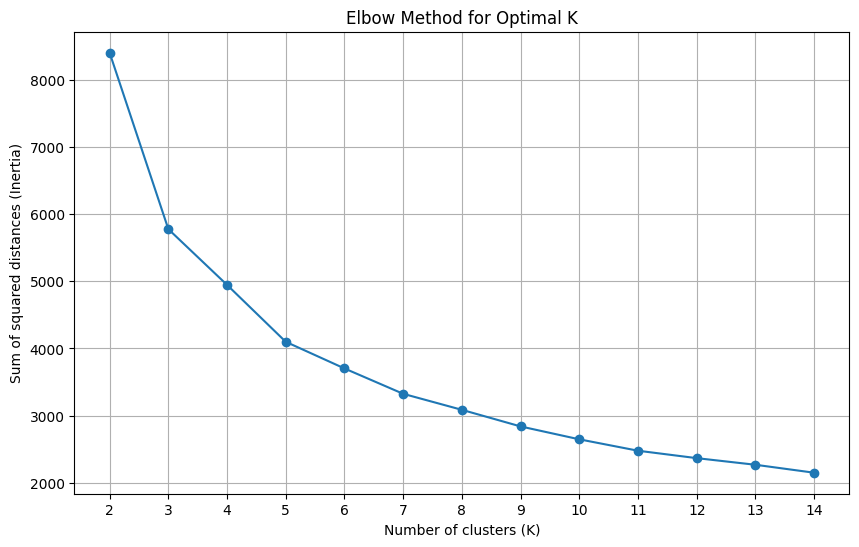

In [682]:
plt.figure(figsize=(10, 6))
plt.plot(range(StartK, EndK), ToVar, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.xticks(range(StartK, EndK))
plt.grid(True)
plt.show()

In [683]:
LoopResult = pd.DataFrame(np.arange(StartK,EndK,1),columns=['K_Values'])
LoopResult['Silhouette_Score'] = SilScore
LoopResult['Var'] = ToVar
LoopResult

,K_Values,Silhouette_Score,Var
0,2,0.485423,8403.401221
1,3,0.418611,5776.361026
2,4,0.337128,4946.065186
3,5,0.320520,4098.544732
4,6,0.309282,3701.844132
5,7,0.315851,3324.239492
6,8,0.290258,3085.663706
7,9,0.289622,2838.444141
8,10,0.290990,2646.502250
9,11,0.282440,2476.694836


## Clustering with K=6

In [684]:
# Clustering with optimal K
kmeans = KMeans(n_clusters=2, init="k-means++", n_init="auto", random_state=0)
# df_scaled['clusters'] = kmeans.fit_predict(df_scaled[clustering_features])
df_scaled['clusters'] = kmeans.fit_predict(pca_cols)

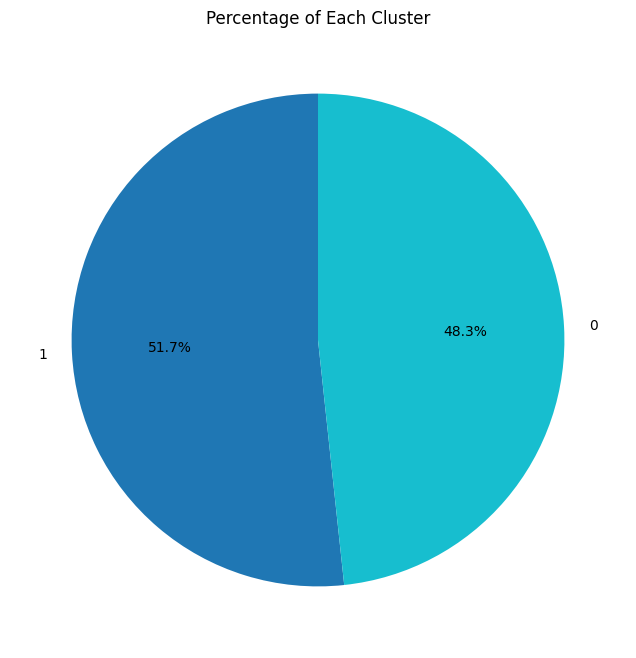

In [685]:
plt.figure(figsize=(8, 8))
df_scaled['clusters'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10')
plt.title('Percentage of Each Cluster')
plt.ylabel('') # Hide the default 'clusters' label on the y-axis
plt.show()

## Analyze Cluster Profiles

Calculate the mean of each feature for every cluster to understand the distinct characteristics of each customer segment.


In [687]:
# Define clustering features (columns available in df_scaled)
clustering_features = [
    'education_level', 'annual_income', 'num_children', 'num_teenagers',
    'days_since_last_purchase', 'web_visits_last_month', 'total_accepted_campaigns', 
    'age', 'signup_year', 'total_spent', 'total_purchases', 'family_size'
]

cluster_profiles = df_scaled.groupby('clusters')[clustering_features].mean()
print("Cluster profiles:")
print(cluster_profiles)

Cluster profiles:
          education_level  annual_income  num_children  num_teenagers  \
clusters                                                                
0                0.666359       0.363628      0.764325       0.499076   
1                0.542314       0.616047      0.145078       0.493955   

          days_since_last_purchase  web_visits_last_month  \
clusters                                                    
0                         0.497321               0.469707   
1                         0.494871               0.309930   

          total_accepted_campaigns       age  signup_year  total_spent  \
clusters                                                                 
0                         0.158041  0.395434     0.566081     0.306704   
1                         0.378238  0.451047     0.465458     0.761574   

          total_purchases  family_size  
clusters                                
0                0.210310      2.92329  
1                0.51320

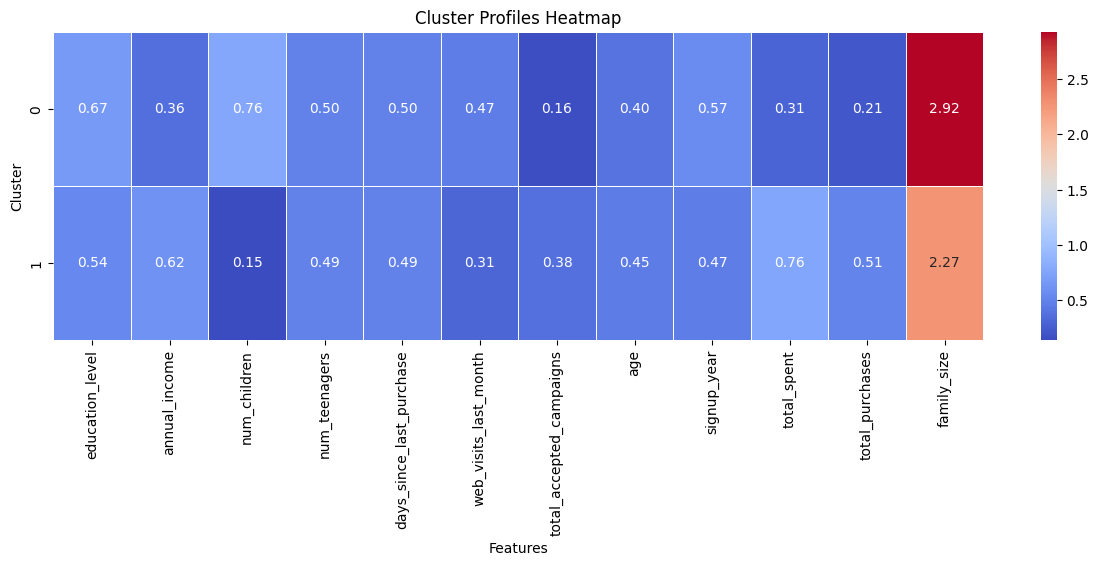

In [688]:
plt.figure(figsize=(15, 4))
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cluster Profiles Heatmap')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

### Data Analysis Key Findings

* Cluster 0 showed higher average spending on fruits and sweets.
* Cluster 1 had generally lower spending but higher average age and number of children.
* Cluster 2 had higher average spending.

## DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a clustering algorithm that groups together points that are closely packed together, marking points in low-density regions as outliers.

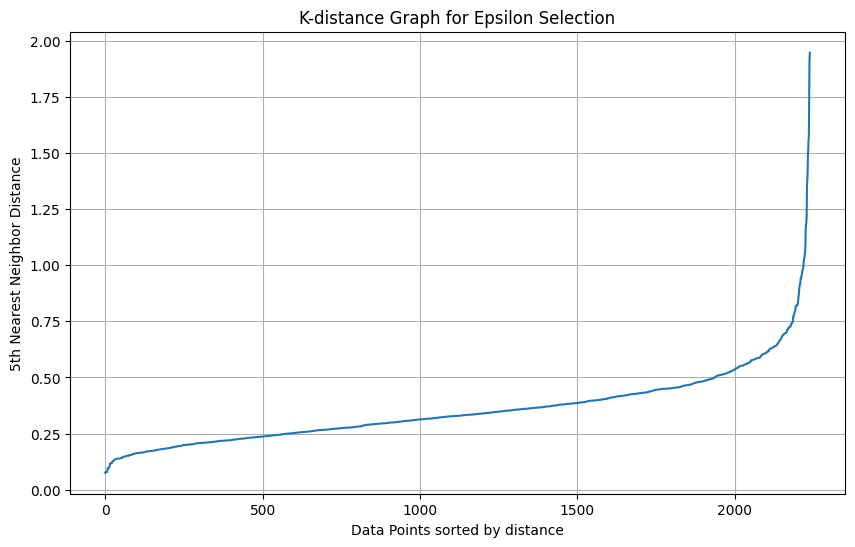

Look for the 'elbow' point in the graph to determine optimal epsilon


In [689]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(pca_cols)
distances, indices = neighbors_fit.kneighbors(pca_cols)

distances = np.sort(distances[:, -1], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-distance Graph for Epsilon Selection')
plt.grid(True)
plt.show()

print("Look for the 'elbow' point in the graph to determine optimal epsilon")

In [690]:
# Apply DBSCAN clustering
# You may need to adjust eps and min_samples based on the k-distance graph
dbscan = DBSCAN(eps=0.2, min_samples=10)
df_scaled['dbscan_clusters'] = dbscan.fit_predict(pca_cols)

# Count clusters and noise points
n_clusters = len(set(df_scaled['dbscan_clusters'])) - (1 if -1 in df_scaled['dbscan_clusters'] else 0)
n_noise = list(df_scaled['dbscan_clusters']).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"\nCluster distribution:")
print(df_scaled['dbscan_clusters'].value_counts().sort_index())

Number of clusters: 5
Number of noise points: 2167

Cluster distribution:
dbscan_clusters
-1    2167
 0      19
 1      30
 2      14
 3      10
Name: count, dtype: int64


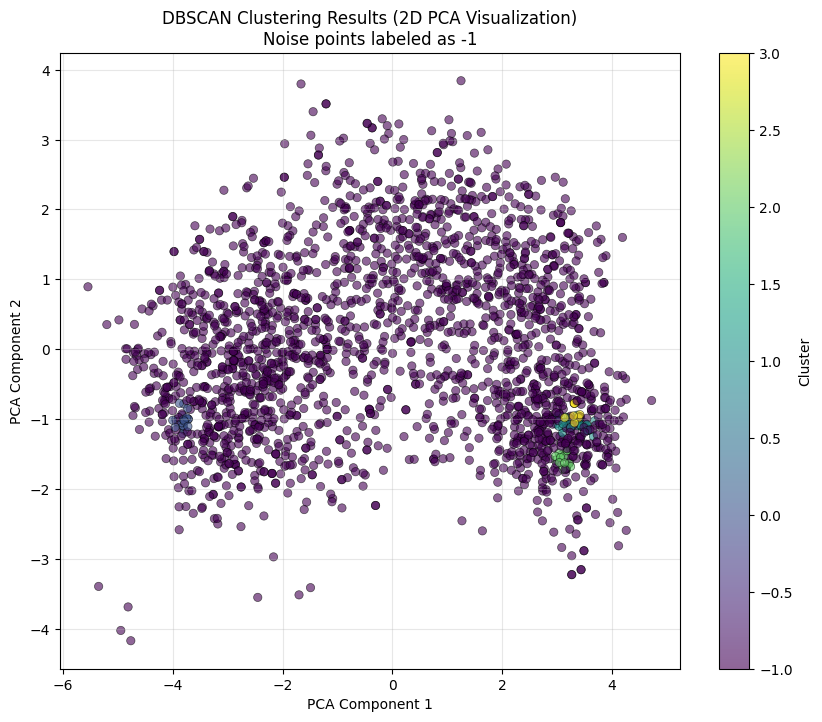

In [691]:
# Visualize DBSCAN clusters in 2D (using first 2 PCA components)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_cols['col1'], pca_cols['col2'], 
                     c=df_scaled['dbscan_clusters'], 
                     cmap='viridis', 
                     alpha=0.6, 
                     edgecolors='black',
                     linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Results (2D PCA Visualization)\nNoise points labeled as -1')
plt.grid(True, alpha=0.3)
plt.show()

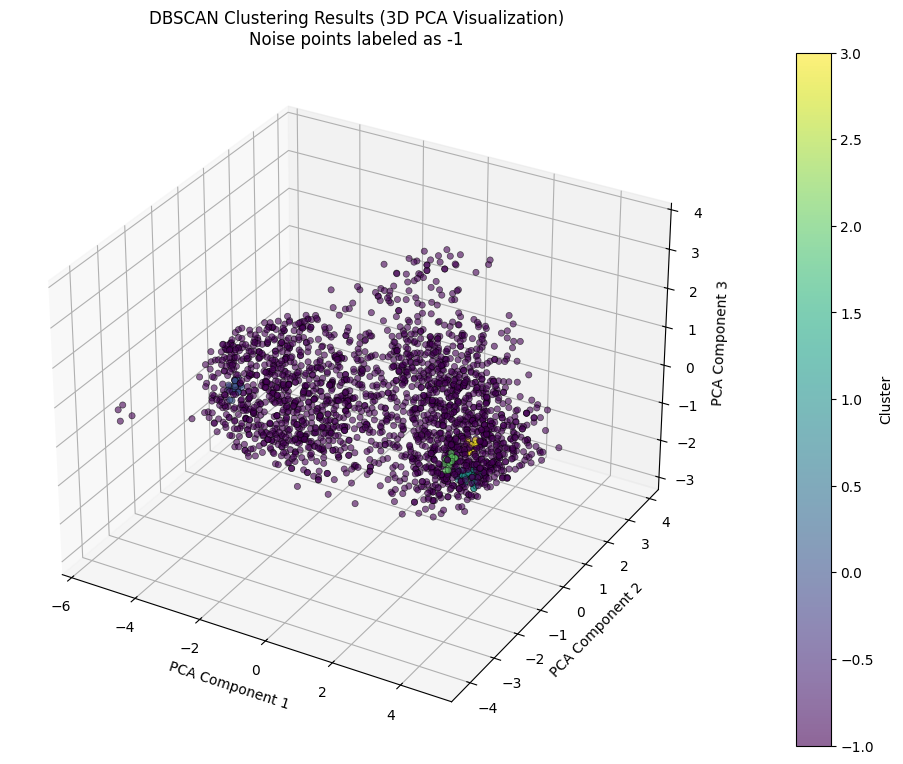

In [692]:
# Visualize DBSCAN clusters in 3D (using all 3 PCA components)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(pca_cols['col1'], 
                    pca_cols['col2'], 
                    pca_cols['col3'],
                    c=df_scaled['dbscan_clusters'], 
                    cmap='viridis', 
                    alpha=0.6,
                    edgecolors='black',
                    linewidth=0.5)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('DBSCAN Clustering Results (3D PCA Visualization)\nNoise points labeled as -1')
plt.colorbar(scatter, label='Cluster', pad=0.1)
plt.show()

DBSCAN Cluster Profiles (excluding noise):
                 education_level  annual_income  num_children  num_teenagers  \
dbscan_clusters                                                                
0                       0.421053       0.336009      0.789474       0.315789   
1                       0.400000       0.697619      0.000000       0.000000   
2                       0.642857       0.707082      0.000000       0.000000   
3                       0.500000       0.739316      0.000000       0.000000   

                 days_since_last_purchase  web_visits_last_month  \
dbscan_clusters                                                    
0                                0.349814               0.512548   
1                                0.431650               0.189731   
2                                0.563492               0.138741   
3                                0.672727               0.161611   

                 total_accepted_campaigns       age  signup_year  t

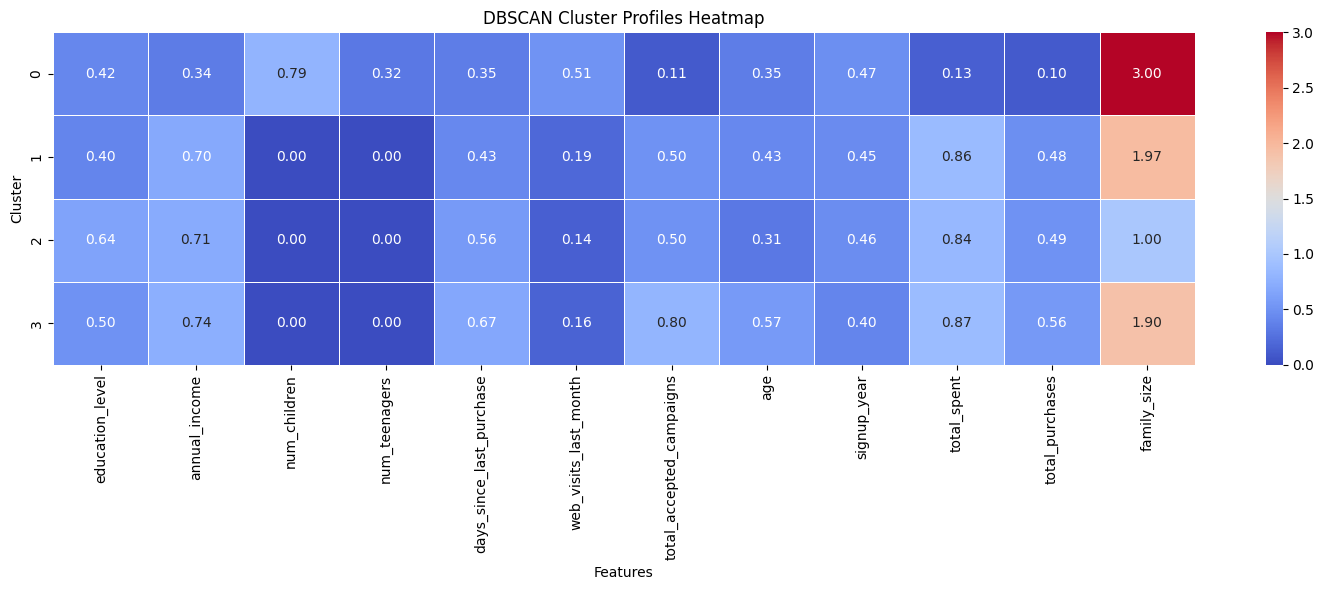

In [693]:
# Analyze DBSCAN cluster profiles (excluding noise points)
if n_clusters > 0:
    # Filter out noise points (-1)
    clustered_data = df_scaled[df_scaled['dbscan_clusters'] != -1]
    
    dbscan_profiles = clustered_data.groupby('dbscan_clusters')[clustering_features].mean()
    
    print("DBSCAN Cluster Profiles (excluding noise):")
    print(dbscan_profiles)
    
    # Heatmap
    plt.figure(figsize=(15, 6))
    sns.heatmap(dbscan_profiles, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('DBSCAN Cluster Profiles Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Cluster')
    plt.tight_layout()
    plt.show()
else:
    print("No clusters found. Try adjusting eps and min_samples parameters.")

In [694]:
df_scaled.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size,clusters,dbscan_clusters
0,0,0.553381,0,0.0,0.585859,1.062784,1.487681,1.504406,1.493989,1.474200,...,-0.415926,0.515871,1.0,0.609375,0.0,0.886214,0.617284,1.0,1,-1
1,0,0.453996,1,1.0,0.383838,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,...,-1.418287,0.360876,0.0,0.656250,1.0,0.164498,0.148148,3.0,0,-1
2,0,0.662562,0,0.0,0.262626,0.748918,1.145877,0.456428,1.435812,0.579704,...,1.244092,0.285047,0.0,0.484375,0.5,0.714948,0.518519,2.0,1,-1
3,0,0.276494,1,0.0,0.262626,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,...,-0.415926,0.437868,0.0,0.187500,1.0,0.249374,0.197531,3.0,0,-1
4,1,0.554661,1,0.0,0.949495,0.123712,1.058075,0.406278,0.832291,0.741799,...,0.275211,0.360876,0.0,0.234375,1.0,0.588802,0.469136,3.0,1,-1


### Mapping for clusrting

### Spliting

In [695]:
df.head()

,education_level,annual_income,num_children,num_teenagers,days_since_last_purchase,spend_wine,spend_fruits,spend_meat,spend_fish,spend_sweets,...,num_web_purchases,num_catalog_purchases,num_store_purchases,web_visits_last_month,total_accepted_campaigns,age,signup_year,total_spent,total_purchases,family_size
0,0,0.333964,0,0.0,58,1.062784,1.487681,1.504406,1.493989,1.474200,...,1.358219,1.756826,-0.415926,0.720800,1,57,2012,1.315365,25.0,1.0
1,0,-0.226114,1,1.0,38,-1.211545,-1.001121,-1.376502,-0.889143,-0.987648,...,-1.357883,-0.380498,-1.418287,-0.146845,0,60,2014,-1.441417,6.0,3.0
2,0,0.949251,0,0.0,26,0.748918,1.145877,0.456428,1.435812,0.579704,...,1.358219,0.154282,1.244092,-0.571328,0,49,2013,0.661170,21.0,2.0
3,0,-1.226416,1,0.0,26,-1.211545,-0.403311,-0.722233,-0.110828,-0.542753,...,-0.720558,-1.335398,-0.415926,0.284150,0,30,2014,-1.117211,8.0,3.0
4,1,0.341179,1,0.0,94,0.123712,1.058075,0.406278,0.832291,0.741799,...,0.525667,0.523444,0.275211,-0.146845,0,33,2014,0.179322,19.0,3.0


In [696]:
print(df_scaled['clusters'].value_counts())

clusters
1    1158
0    1082
Name: count, dtype: int64


In [697]:
x = df.copy()
y = df_scaled['clusters']

In [698]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Scalling

In [699]:
x_train[cols_to_standardize]= scaler.fit_transform(x_train[cols_to_standardize])
x_test[cols_to_standardize]= scaler.transform(x_test[cols_to_standardize])

# Modeling

In [701]:
# Initialize dictionary to store results for comparison
model_results = {
    'Model': [],
    'Accuracy': [],
    'Precision (Macro)': [],
    'Recall (Macro)': [],
    'F1 Score (Macro)': []
}

# Dictionary to store feature importances
feature_importances = {}

## Logistic Regression

In [706]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
train_accuracy = lr_model.score(x_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9977678571428571


In [712]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='macro')
lr_recall = recall_score(y_test, lr_pred, average='macro')
lr_f1 = f1_score(y_test, lr_pred, average='macro')

# Store results
model_results['Model'].append('Logistic Regression')
model_results['Accuracy'].append(lr_accuracy)
model_results['Precision (Macro)'].append(lr_precision)
model_results['Recall (Macro)'].append(lr_recall)
model_results['F1 Score (Macro)'].append(lr_f1)

# Display metrics
print("=" * 60)
print("LOGISTIC REGRESSION - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * lr_accuracy:.2f}%")
print(f"Precision (Macro): {100 * lr_precision:.2f}%")
print(f"Recall (Macro):    {100 * lr_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * lr_f1:.2f}%")
print("=" * 60)

LOGISTIC REGRESSION - EVALUATION METRICS
Accuracy:         99.78%
Precision (Macro): 99.80%
Recall (Macro):    99.75%
F1 Score (Macro):  99.77%


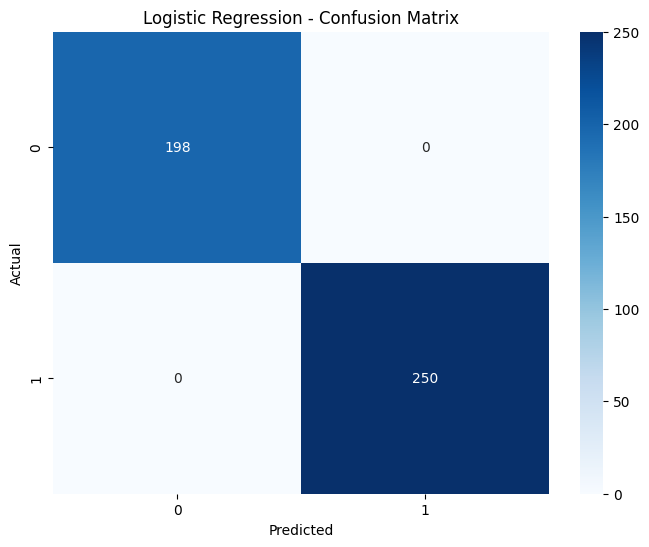


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       250

    accuracy                           1.00       448
   macro avg       1.00      1.00      1.00       448
weighted avg       1.00      1.00      1.00       448



In [ ]:
# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

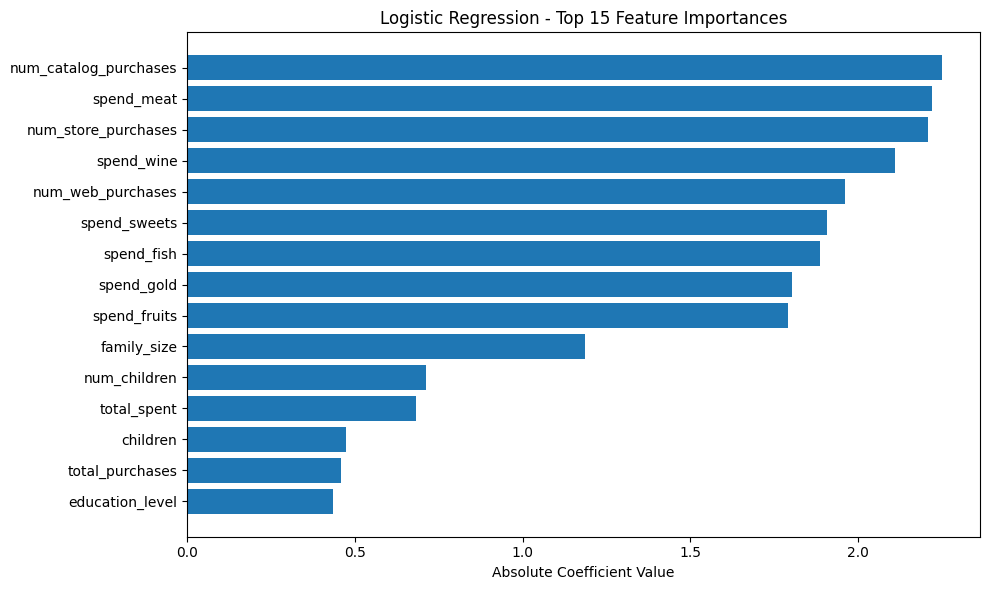


Top 10 Most Important Features:
                  Feature  Importance
13  num_catalog_purchases    2.251567
7              spend_meat    2.222390
14    num_store_purchases    2.210332
5              spend_wine    2.111589
12      num_web_purchases    1.961919
9            spend_sweets    1.908582
8              spend_fish    1.887027
10             spend_gold    1.803451
6            spend_fruits    1.790941
22            family_size    1.186205


In [ ]:
# Feature Importance for Logistic Regression (based on coefficients)
feature_names = x_train.columns
lr_importance = np.abs(lr_model.coef_[0])  # Use absolute values
feature_importances['Logistic Regression'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lr_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['Logistic Regression'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Logistic Regression'].head(10))

## Decision Tree

DECISION TREE - EVALUATION METRICS
Accuracy:         96.88%
Precision (Macro): 96.94%
Recall (Macro):    96.73%
F1 Score (Macro):  96.83%


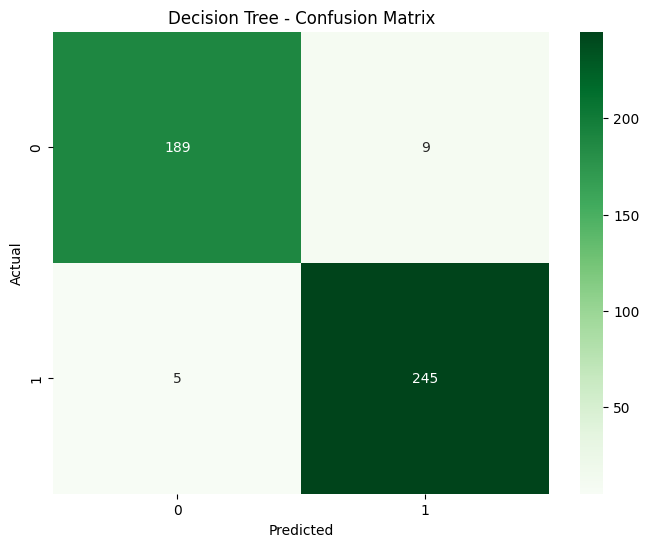


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       198
           1       0.96      0.98      0.97       250

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [ ]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='macro')
dt_recall = recall_score(y_test, dt_pred, average='macro')
dt_f1 = f1_score(y_test, dt_pred, average='macro')

# Store results
model_results['Model'].append('Decision Tree')
model_results['Accuracy'].append(dt_accuracy)
model_results['Precision (Macro)'].append(dt_precision)
model_results['Recall (Macro)'].append(dt_recall)
model_results['F1 Score (Macro)'].append(dt_f1)

# Display metrics
print("=" * 60)
print("DECISION TREE - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * dt_accuracy:.2f}%")
print(f"Precision (Macro): {100 * dt_precision:.2f}%")
print(f"Recall (Macro):    {100 * dt_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * dt_f1:.2f}%")
print("=" * 60)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.title('Decision Tree - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

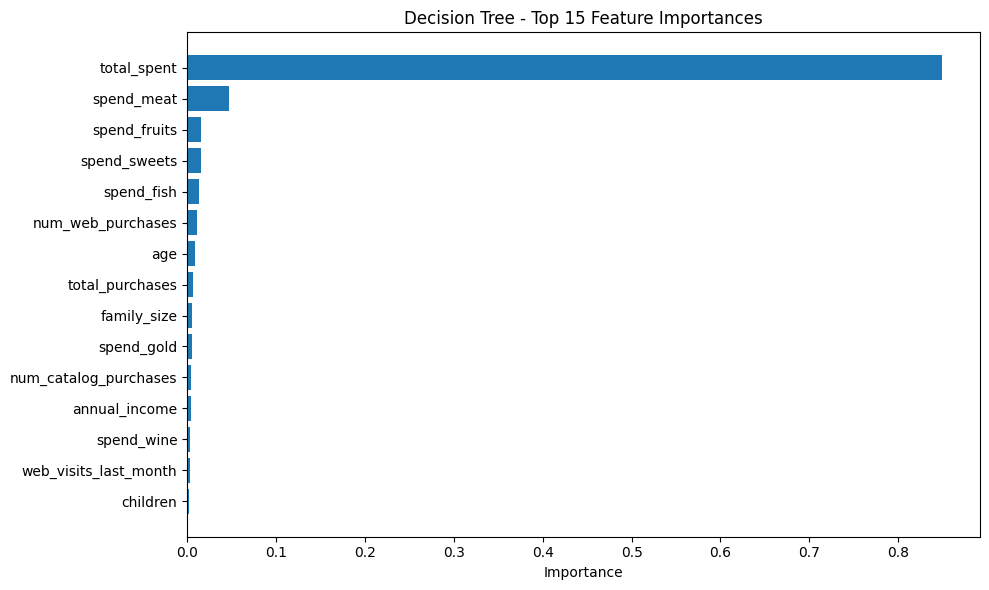


Top 10 Most Important Features:
              Feature  Importance
19        total_spent    0.849503
7          spend_meat    0.046687
6        spend_fruits    0.016039
9        spend_sweets    0.015029
8          spend_fish    0.013813
12  num_web_purchases    0.010696
17                age    0.009089
20    total_purchases    0.006027
22        family_size    0.005564
10         spend_gold    0.004854


In [ ]:
# Feature Importance for Decision Tree
dt_importance = dt_model.feature_importances_
feature_importances['Decision Tree'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['Decision Tree'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Decision Tree - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Decision Tree'].head(10))

## Random Forest

RANDOM FOREST - EVALUATION METRICS
Accuracy:         98.66%
Precision (Macro): 98.64%
Recall (Macro):    98.64%
F1 Score (Macro):  98.64%


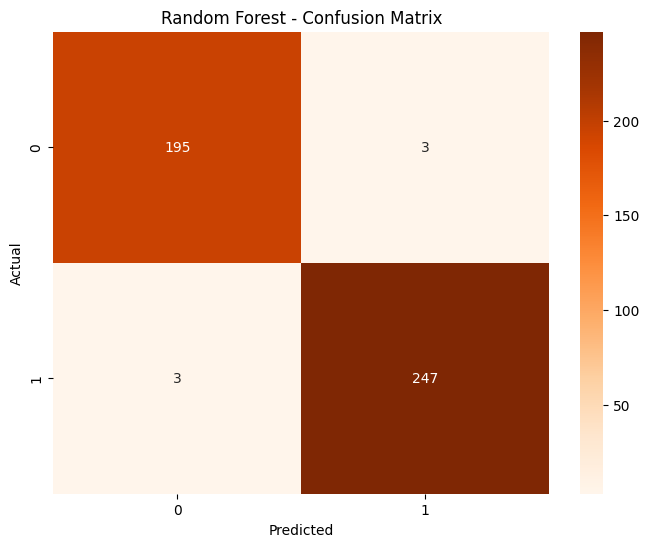


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.99      0.99      0.99       250

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448



In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='macro')
rf_recall = recall_score(y_test, rf_pred, average='macro')
rf_f1 = f1_score(y_test, rf_pred, average='macro')

# Store results
model_results['Model'].append('Random Forest')
model_results['Accuracy'].append(rf_accuracy)
model_results['Precision (Macro)'].append(rf_precision)
model_results['Recall (Macro)'].append(rf_recall)
model_results['F1 Score (Macro)'].append(rf_f1)

# Display metrics
print("=" * 60)
print("RANDOM FOREST - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * rf_accuracy:.2f}%")
print(f"Precision (Macro): {100 * rf_precision:.2f}%")
print(f"Recall (Macro):    {100 * rf_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * rf_f1:.2f}%")
print("=" * 60)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Oranges', cbar=True)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

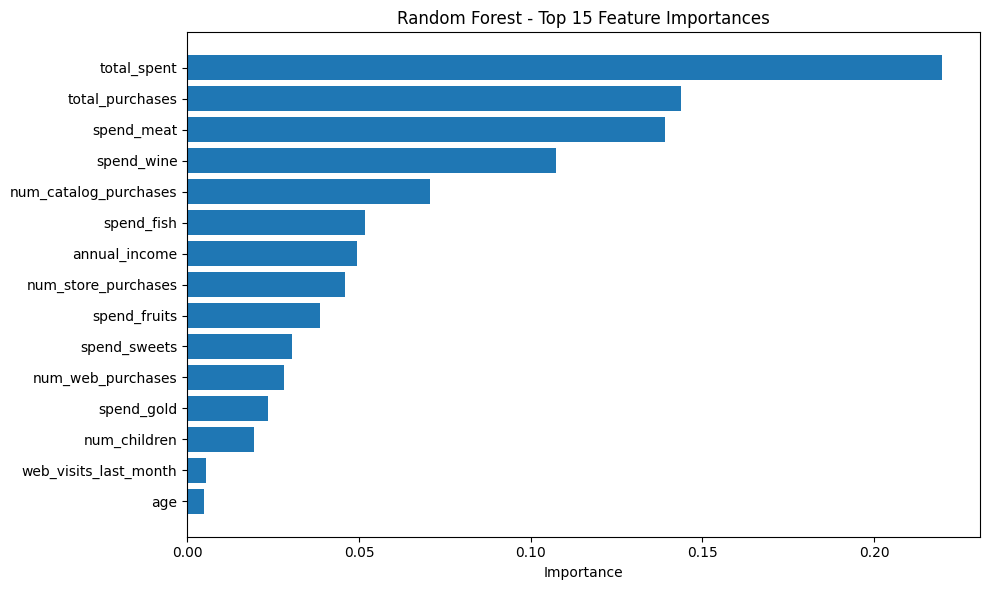


Top 10 Most Important Features:
                  Feature  Importance
19            total_spent    0.219802
20        total_purchases    0.143646
7              spend_meat    0.139191
5              spend_wine    0.107333
13  num_catalog_purchases    0.070544
8              spend_fish    0.051821
1           annual_income    0.049458
14    num_store_purchases    0.046062
6            spend_fruits    0.038745
9            spend_sweets    0.030486


In [ ]:
# Feature Importance for Random Forest
rf_importance = rf_model.feature_importances_
feature_importances['Random Forest'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['Random Forest'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('Random Forest - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['Random Forest'].head(10))

## K-Nearest Neighbors

K-NEAREST NEIGHBORS - EVALUATION METRICS
Accuracy:         97.32%
Precision (Macro): 97.21%
Recall (Macro):    97.39%
F1 Score (Macro):  97.29%


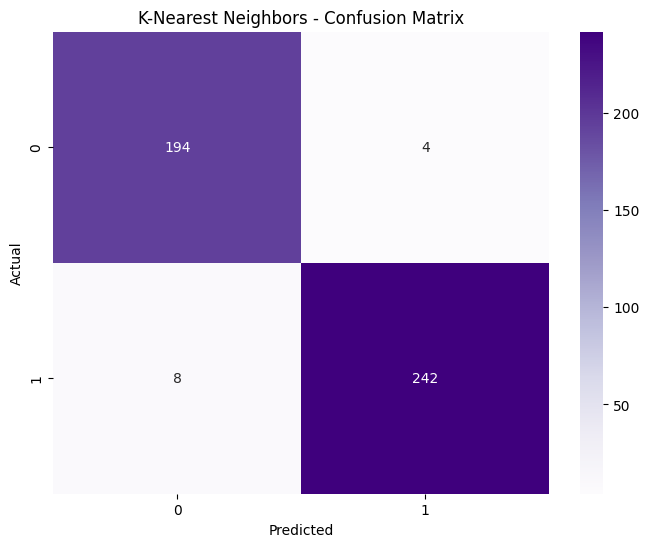


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       198
           1       0.98      0.97      0.98       250

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



In [ ]:
# Train K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

# Calculate metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='macro')
knn_recall = recall_score(y_test, knn_pred, average='macro')
knn_f1 = f1_score(y_test, knn_pred, average='macro')

# Store results
model_results['Model'].append('K-Nearest Neighbors')
model_results['Accuracy'].append(knn_accuracy)
model_results['Precision (Macro)'].append(knn_precision)
model_results['Recall (Macro)'].append(knn_recall)
model_results['F1 Score (Macro)'].append(knn_f1)

# Display metrics
print("=" * 60)
print("K-NEAREST NEIGHBORS - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * knn_accuracy:.2f}%")
print(f"Precision (Macro): {100 * knn_precision:.2f}%")
print(f"Recall (Macro):    {100 * knn_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * knn_f1:.2f}%")
print("=" * 60)

# Confusion Matrix
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, knn_pred))

## Naive Bayes

NAIVE BAYES - EVALUATION METRICS
Accuracy:         97.54%
Precision (Macro): 97.59%
Recall (Macro):    97.43%
F1 Score (Macro):  97.51%


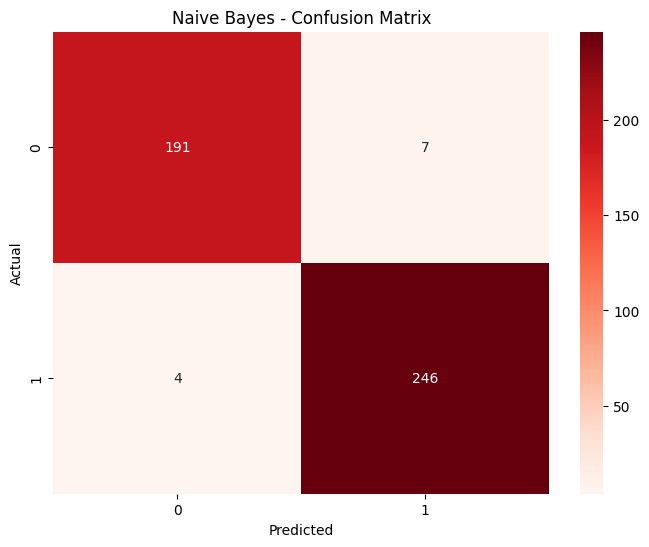


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       198
           1       0.97      0.98      0.98       250

    accuracy                           0.98       448
   macro avg       0.98      0.97      0.98       448
weighted avg       0.98      0.98      0.98       448



In [ ]:
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

# Calculate metrics
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='macro')
nb_recall = recall_score(y_test, nb_pred, average='macro')
nb_f1 = f1_score(y_test, nb_pred, average='macro')

# Store results
model_results['Model'].append('Naive Bayes')
model_results['Accuracy'].append(nb_accuracy)
model_results['Precision (Macro)'].append(nb_precision)
model_results['Recall (Macro)'].append(nb_recall)
model_results['F1 Score (Macro)'].append(nb_f1)

# Display metrics
print("=" * 60)
print("NAIVE BAYES - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * nb_accuracy:.2f}%")
print(f"Precision (Macro): {100 * nb_precision:.2f}%")
print(f"Recall (Macro):    {100 * nb_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * nb_f1:.2f}%")
print("=" * 60)

# Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

## XGBoost

XGBOOST - EVALUATION METRICS
Accuracy:         98.44%
Precision (Macro): 98.39%
Recall (Macro):    98.44%
F1 Score (Macro):  98.42%


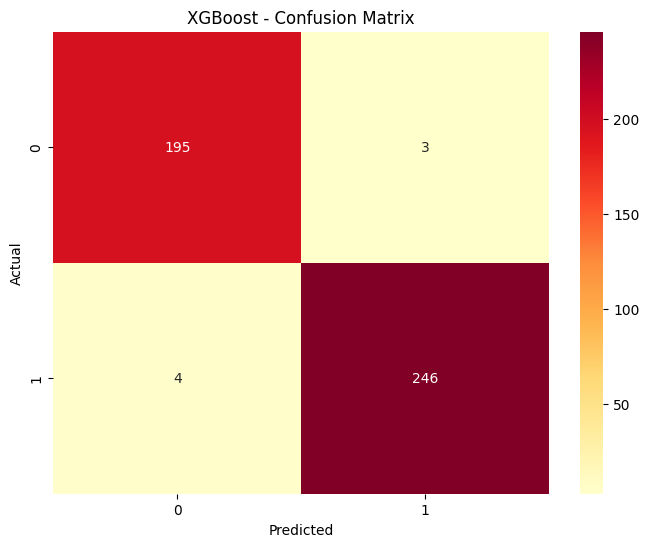


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.99      0.98      0.99       250

    accuracy                           0.98       448
   macro avg       0.98      0.98      0.98       448
weighted avg       0.98      0.98      0.98       448



In [ ]:
# Train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)
xgb_pred = xgb_model.predict(x_test)

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='macro')
xgb_recall = recall_score(y_test, xgb_pred, average='macro')
xgb_f1 = f1_score(y_test, xgb_pred, average='macro')

# Store results
model_results['Model'].append('XGBoost')
model_results['Accuracy'].append(xgb_accuracy)
model_results['Precision (Macro)'].append(xgb_precision)
model_results['Recall (Macro)'].append(xgb_recall)
model_results['F1 Score (Macro)'].append(xgb_f1)

# Display metrics
print("=" * 60)
print("XGBOOST - EVALUATION METRICS")
print("=" * 60)
print(f"Accuracy:         {100 * xgb_accuracy:.2f}%")
print(f"Precision (Macro): {100 * xgb_precision:.2f}%")
print(f"Recall (Macro):    {100 * xgb_recall:.2f}%")
print(f"F1 Score (Macro):  {100 * xgb_f1:.2f}%")
print("=" * 60)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='YlOrRd', cbar=True)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, xgb_pred))

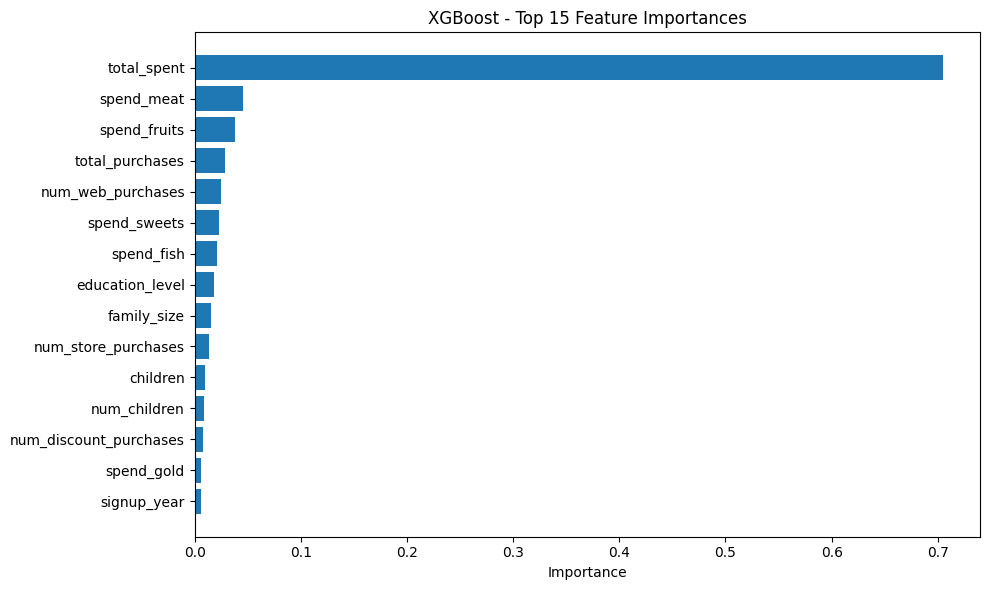


Top 10 Most Important Features:
                Feature  Importance
19          total_spent    0.704521
7            spend_meat    0.045742
6          spend_fruits    0.037741
20      total_purchases    0.028475
12    num_web_purchases    0.024809
9          spend_sweets    0.023325
8            spend_fish    0.020866
0       education_level    0.017905
22          family_size    0.015318
14  num_store_purchases    0.013657


In [ ]:
# Feature Importance for XGBoost
xgb_importance = xgb_model.feature_importances_
feature_importances['XGBoost'] = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_importance
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importances['XGBoost'].head(15)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importances['XGBoost'].head(10))

## Model Comparison

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1 Score (Macro)
Logistic Regression    1.0000             1.0000          1.0000            1.0000
      Decision Tree    0.9688             0.9694          0.9673            0.9683
      Random Forest    0.9866             0.9864          0.9864            0.9864
K-Nearest Neighbors    0.9732             0.9721          0.9739            0.9729
        Naive Bayes    0.9754             0.9759          0.9743            0.9751
            XGBoost    0.9844             0.9839          0.9844            0.9842


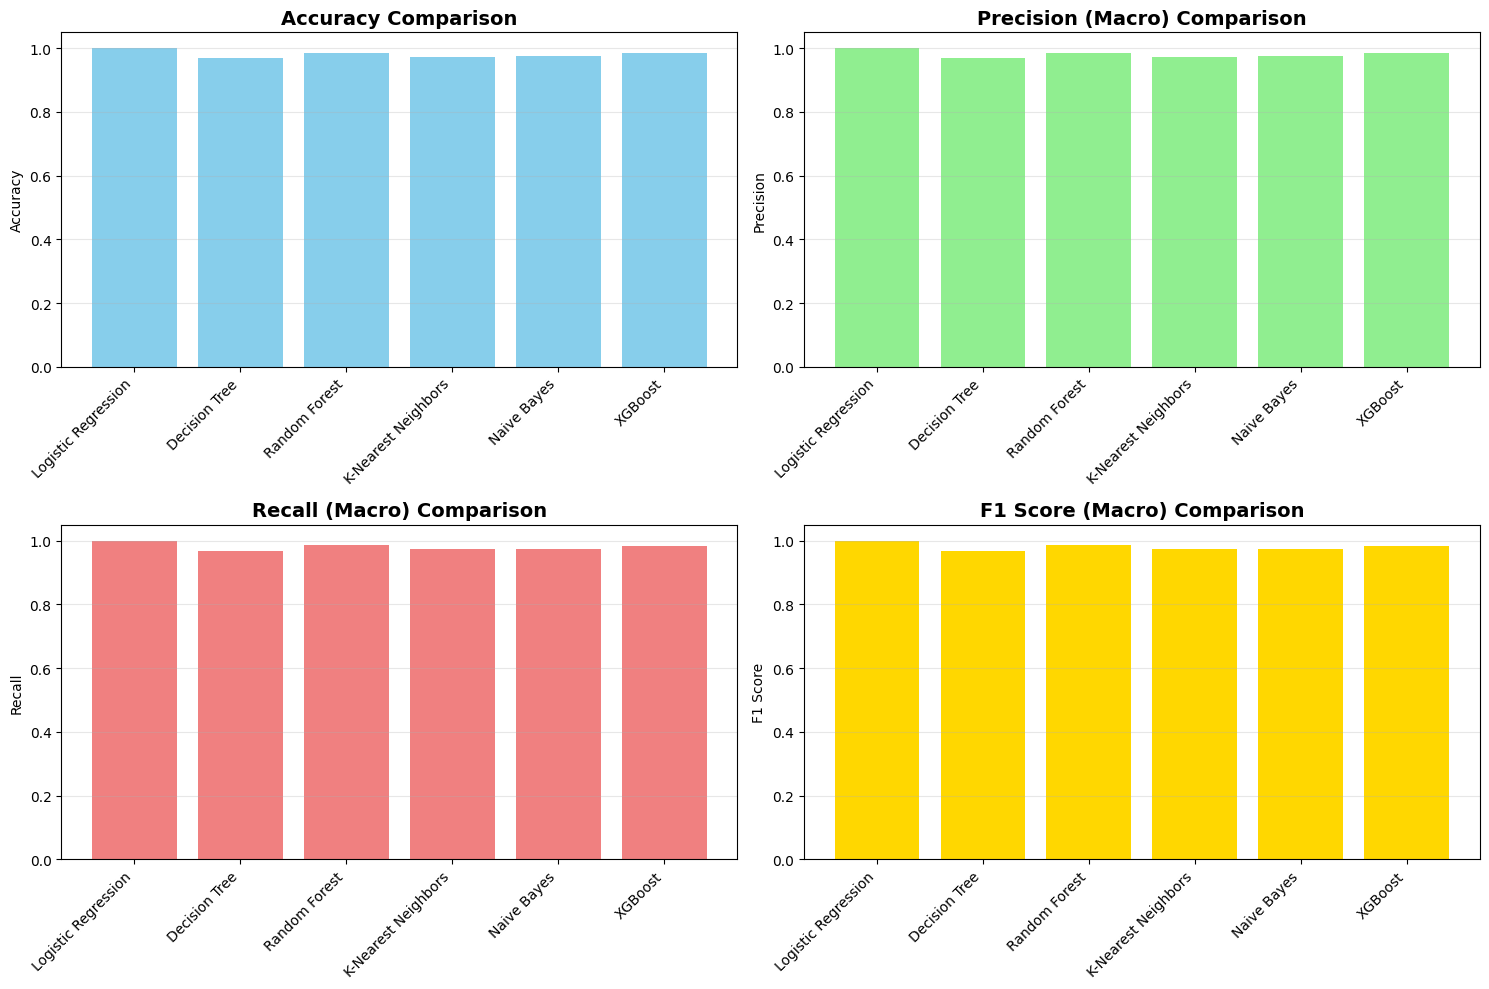


🏆 BEST MODEL: Logistic Regression
   Accuracy: 1.0000
   F1 Score: 1.0000


In [ ]:
# Create comparison dataframe
results_df = pd.DataFrame(model_results)
results_df = results_df.round(4)

print("=" * 80)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 80)
print(results_df.to_string(index=False))
print("=" * 80)

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 0].grid(axis='y', alpha=0.3)

# Precision comparison
axes[0, 1].bar(results_df['Model'], results_df['Precision (Macro)'], color='lightgreen')
axes[0, 1].set_title('Precision (Macro) Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].grid(axis='y', alpha=0.3)

# Recall comparison
axes[1, 0].bar(results_df['Model'], results_df['Recall (Macro)'], color='lightcoral')
axes[1, 0].set_title('Recall (Macro) Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 0].grid(axis='y', alpha=0.3)

# F1 Score comparison
axes[1, 1].bar(results_df['Model'], results_df['F1 Score (Macro)'], color='gold')
axes[1, 1].set_title('F1 Score (Macro) Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('F1 Score')
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = results_df['Accuracy'].idxmax()
print(f"\n🏆 BEST MODEL: {results_df.loc[best_model_idx, 'Model']}")
print(f"   Accuracy: {results_df.loc[best_model_idx, 'Accuracy']:.4f}")
print(f"   F1 Score: {results_df.loc[best_model_idx, 'F1 Score (Macro)']:.4f}")

## Feature Importance Comparison

TOP 10 FEATURES BY MODEL

Logistic Regression:
              Feature  Importance
num_catalog_purchases    2.251567
           spend_meat    2.222390
  num_store_purchases    2.210332
           spend_wine    2.111589
    num_web_purchases    1.961919
         spend_sweets    1.908582
           spend_fish    1.887027
           spend_gold    1.803451
         spend_fruits    1.790941
          family_size    1.186205
--------------------------------------------------------------------------------

Decision Tree:
          Feature  Importance
      total_spent    0.849503
       spend_meat    0.046687
     spend_fruits    0.016039
     spend_sweets    0.015029
       spend_fish    0.013813
num_web_purchases    0.010696
              age    0.009089
  total_purchases    0.006027
      family_size    0.005564
       spend_gold    0.004854
--------------------------------------------------------------------------------

Random Forest:
              Feature  Importance
          total_spent

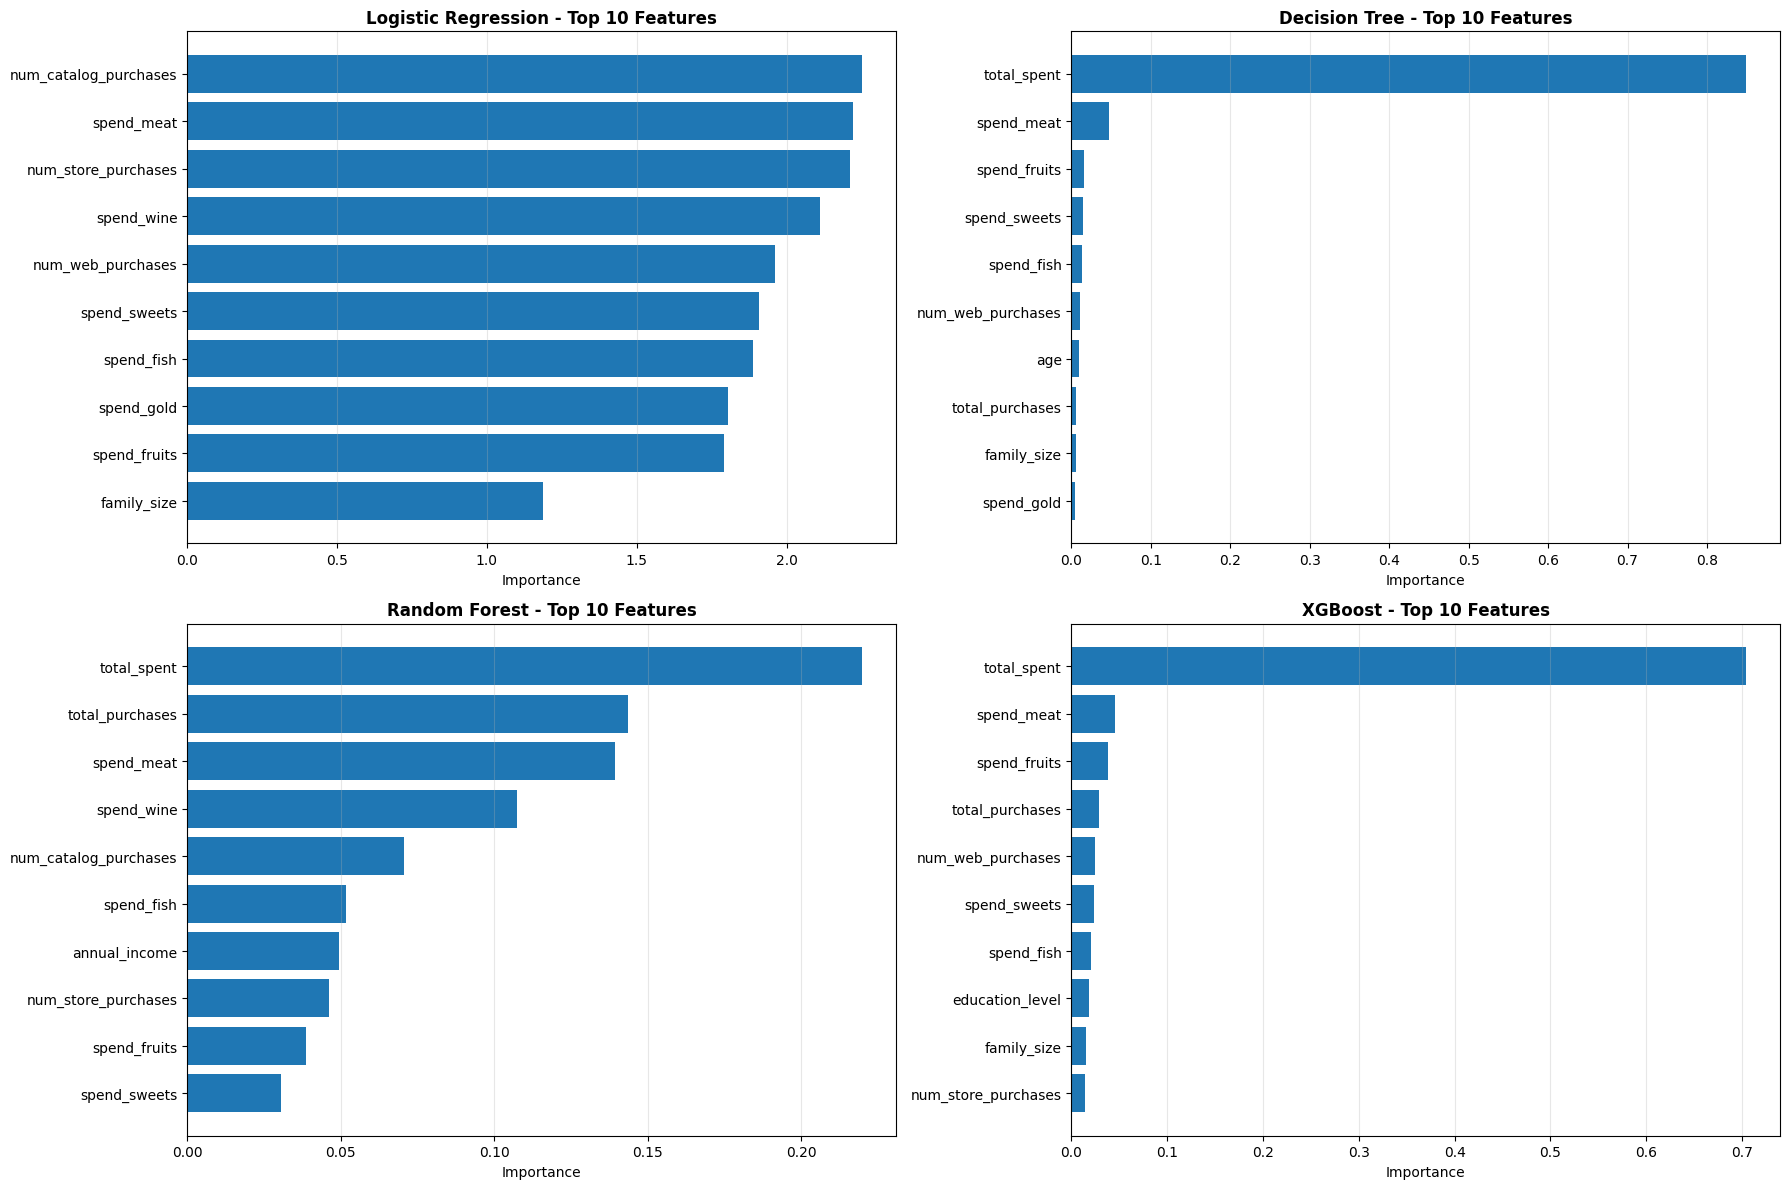

In [ ]:
# Compare feature importances across tree-based models
models_with_importance = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Get top 10 features from each model
print("=" * 80)
print("TOP 10 FEATURES BY MODEL")
print("=" * 80)

for model_name in models_with_importance:
    if model_name in feature_importances:
        print(f"\n{model_name}:")
        print(feature_importances[model_name].head(10).to_string(index=False))
        print("-" * 80)

# Compare top features across models
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, model_name in enumerate(models_with_importance):
    if model_name in feature_importances:
        top_10 = feature_importances[model_name].head(10)
        axes[idx].barh(top_10['Feature'], top_10['Importance'])
        axes[idx].set_title(f'{model_name} - Top 10 Features', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Importance')
        axes[idx].invert_yaxis()
        axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


FEATURE CONSENSUS ANALYSIS
Features appearing in top 5 across multiple models:
              Feature  Models Count
           spend_meat             4
          total_spent             3
      total_purchases             2
         spend_fruits             2
           spend_wine             2
    num_web_purchases             2
num_catalog_purchases             2
  num_store_purchases             1
           spend_fish             1
         spend_sweets             1


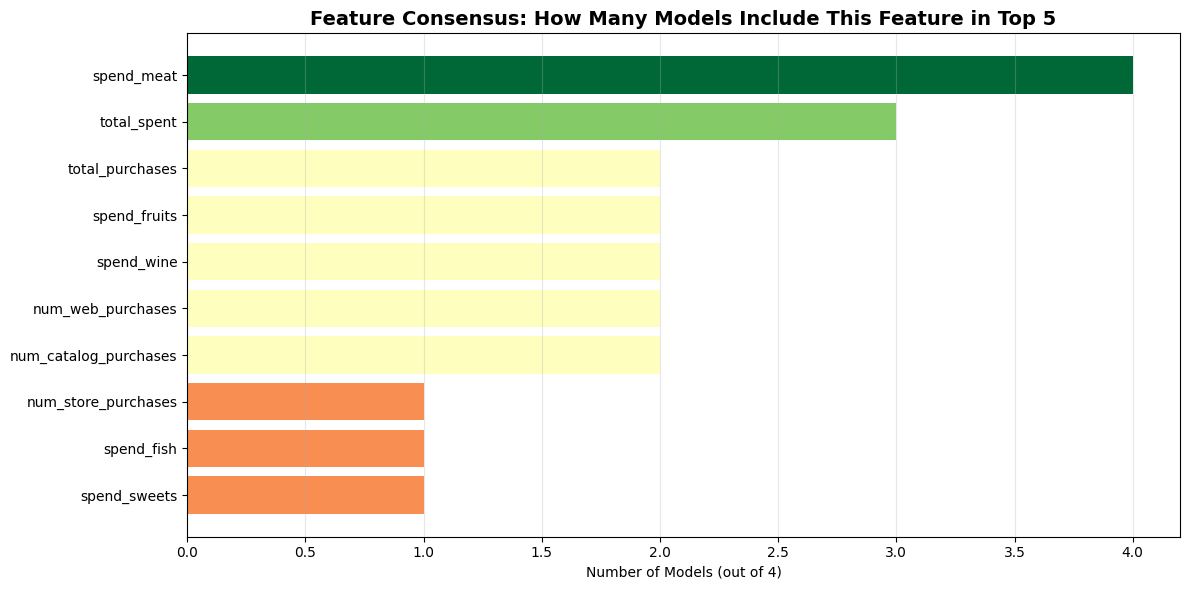


🌟 Most Consistent Features: ['spend_meat', 'total_spent', 'total_purchases']


In [ ]:
# Find consensus features (most important across all models)
all_features = set()
for model_name in models_with_importance:
    if model_name in feature_importances:
        top_5 = feature_importances[model_name].head(5)['Feature'].tolist()
        all_features.update(top_5)

# Count how many times each feature appears in top 5
feature_counts = {}
for feature in all_features:
    count = 0
    for model_name in models_with_importance:
        if model_name in feature_importances:
            top_5 = feature_importances[model_name].head(5)['Feature'].tolist()
            if feature in top_5:
                count += 1
    feature_counts[feature] = count

# Sort by consensus
consensus_df = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Models Count'])
consensus_df = consensus_df.sort_values('Models Count', ascending=False)

print("\n" + "=" * 80)
print("FEATURE CONSENSUS ANALYSIS")
print("=" * 80)
print("Features appearing in top 5 across multiple models:")
print(consensus_df.to_string(index=False))
print("=" * 80)

# Visualize consensus
plt.figure(figsize=(12, 6))
colors = plt.cm.RdYlGn(consensus_df['Models Count'] / consensus_df['Models Count'].max())
plt.barh(consensus_df['Feature'], consensus_df['Models Count'], color=colors)
plt.xlabel('Number of Models (out of 4)')
plt.title('Feature Consensus: How Many Models Include This Feature in Top 5', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🌟 Most Consistent Features: {consensus_df.head(3)['Feature'].tolist()}")

# Interactive Prediction System

Create a system to predict customer segments based on user input and model selection.

In [ ]:
# Store all trained models in a dictionary
models_dict = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'K-Nearest Neighbors': knn_model,
    'Naive Bayes': nb_model,
    'XGBoost': xgb_model
}

print("✅ All models saved successfully!")
print(f"Available models: {list(models_dict.keys())}")

✅ All models saved successfully!
Available models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Naive Bayes', 'XGBoost']


In [ ]:
def predict_with_model(model_name, customer_data):
    """
    Predict customer segment using the selected model
    
    Parameters:
    -----------
    model_name : str
        Name of the model to use ('Logistic Regression', 'Decision Tree', etc.)
    customer_data : dict or DataFrame
        Customer features as dictionary or DataFrame
    
    Returns:
    --------
    prediction : int
        Predicted cluster/segment
    """
    if model_name not in models_dict:
        print(f"❌ Error: Model '{model_name}' not found!")
        print(f"Available models: {list(models_dict.keys())}")
        return None
    
    # Convert dict to DataFrame if needed
    if isinstance(customer_data, dict):
        customer_df = pd.DataFrame([customer_data])
    else:
        customer_df = customer_data.copy()
    
    # Ensure all required features are present
    required_features = feature_names.tolist()
    missing_features = set(required_features) - set(customer_df.columns)
    
    if missing_features:
        print(f"❌ Missing features: {missing_features}")
        return None
    
    # Select only required features in correct order
    customer_df = customer_df[required_features]
    
    # Apply same preprocessing as training data
    customer_df[cols_to_standardize] = scaler.transform(customer_df[cols_to_standardize])
    
    # Get the selected model
    model = models_dict[model_name]
    
    # Make prediction
    prediction = model.predict(customer_df)[0]
    
    print("=" * 60)
    print(f"🎯 MODEL: {model_name}")
    print("=" * 60)
    print(f"Predicted Segment: {prediction}")
    print("=" * 60)
    
    return prediction

## Example Usage

How to use the prediction system with different models

In [ ]:
# Example: Create a sample customer
sample_customer = {
    'education_level': 1,  # Encoded value
    'annual_income': 50000,
    'num_children': 1,
    'num_teenagers': 0,
    'days_since_last_purchase': 30,
    'spend_wine': 300,
    'spend_fruits': 50,
    'spend_meat': 200,
    'spend_fish': 80,
    'spend_sweets': 40,
    'spend_gold': 60,
    'num_discount_purchases': 2,
    'num_web_purchases': 5,
    'num_catalog_purchases': 3,
    'num_store_purchases': 8,
    'web_visits_last_month': 4,
    'total_accepted_campaigns': 1,
    'age': 45,
    'signup_year': 2013,
    'total_spent': 730,
    'total_purchases': 18,
    'children': 1,
    'family_size': 3
}

# Test with different models
print("Testing with sample customer data:\n")

# Try Random Forest
predict_with_model('Random Forest', sample_customer)

Testing with sample customer data:

🎯 MODEL: Random Forest
Predicted Segment: 1


np.int32(1)

In [ ]:
# Try XGBoost
predict_with_model('XGBoost', sample_customer)

🎯 MODEL: XGBoost
Predicted Segment: 1


np.int64(1)

In [ ]:
# Try Logistic Regression
predict_with_model('Logistic Regression', sample_customer)

🎯 MODEL: Logistic Regression
Predicted Segment: 1


np.int32(1)

## Interactive Model Comparison

Compare predictions from all models for the same customer

In [ ]:
def compare_all_models(customer_data):
    """
    Get predictions from all models and compare them
    
    Parameters:
    -----------
    customer_data : dict or DataFrame
        Customer features
    
    Returns:
    --------
    DataFrame with predictions from all models
    """
    results = []
    
    for model_name in models_dict.keys():
        prediction = predict_with_model(model_name, customer_data)
        results.append({
            'Model': model_name,
            'Predicted Segment': prediction
        })
        print()  # Add spacing
    
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(results)
    
    print("\n" + "=" * 60)
    print("📊 PREDICTION COMPARISON - ALL MODELS")
    print("=" * 60)
    print(comparison_df.to_string(index=False))
    print("=" * 60)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    plt.barh(comparison_df['Model'], comparison_df['Predicted Segment'], color='skyblue', edgecolor='black')
    plt.xlabel('Predicted Segment')
    plt.title('Model Predictions Comparison', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return comparison_df

🎯 MODEL: Logistic Regression
Predicted Segment: 1

🎯 MODEL: Decision Tree
Predicted Segment: 1

🎯 MODEL: Random Forest
Predicted Segment: 1



🎯 MODEL: K-Nearest Neighbors
Predicted Segment: 1

🎯 MODEL: Naive Bayes
Predicted Segment: 0

🎯 MODEL: XGBoost
Predicted Segment: 1


📊 PREDICTION COMPARISON - ALL MODELS
              Model  Predicted Segment
Logistic Regression                  1
      Decision Tree                  1
      Random Forest                  1
K-Nearest Neighbors                  1
        Naive Bayes                  0
            XGBoost                  1


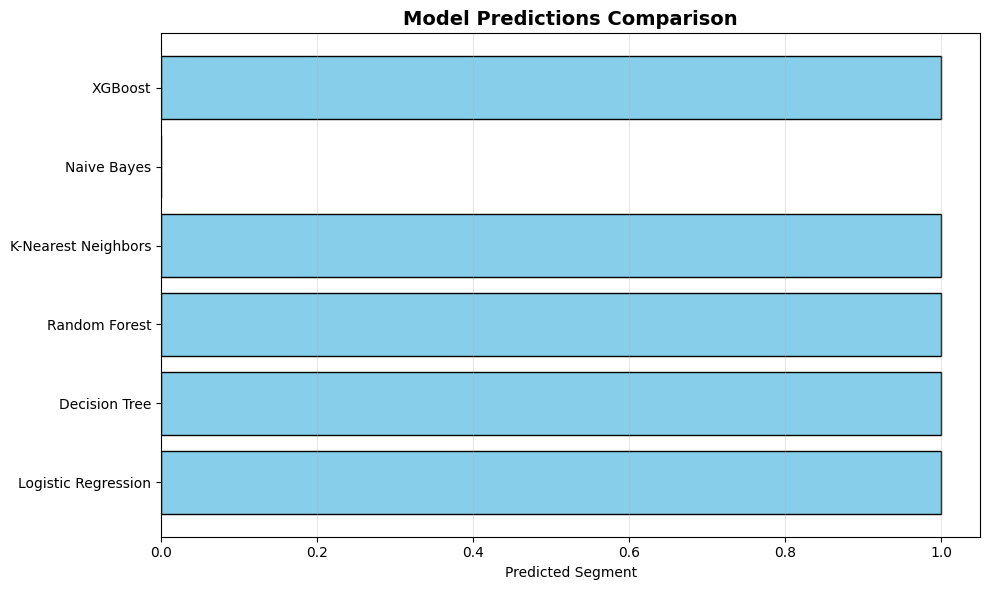

In [ ]:
# Compare all models for the sample customer
comparison_results = compare_all_models(sample_customer)

## Custom Prediction - Your Turn!

Now you can enter your own customer data and choose which model to use

In [ ]:
# Step 1: Define your customer data
my_customer = {
    'education_level': 2,  # 0=Graduate, 1=Postgraduate, 2=Undergraduate
    'annual_income': 60000,
    'num_children': 2,
    'num_teenagers': 1,
    'days_since_last_purchase': 15,
    'spend_wine': 400,
    'spend_fruits': 70,
    'spend_meat': 250,
    'spend_fish': 100,
    'spend_sweets': 50,
    'spend_gold': 80,
    'num_discount_purchases': 3,
    'num_web_purchases': 6,
    'num_catalog_purchases': 2,
    'num_store_purchases': 10,
    'web_visits_last_month': 5,
    'total_accepted_campaigns': 0,
    'age': 38,
    'signup_year': 2012,
    'total_spent': 950,
    'total_purchases': 21,
    'children': 3,
   #'family_size': 5
}

# Step 2: Choose your model
chosen_model = 'Random Forest'  # Change this to any model from the list

# Step 3: Get prediction
print(f"🎯 Using model: {chosen_model}\n")
prediction = predict_with_model(chosen_model, my_customer)

🎯 Using model: Random Forest

❌ Missing features: {'family_size'}
